# Data and Stats

When scraping stock-related data from Reddit, specific cleaning and preprocessing steps were implemented to ensure that the extracted data was accurate, relevant, and well-structured.

A regex pattern (\b[A-Z]{3,5}\b) was used to identify valid stock tickers, which are typically uppercase and between 3 to 5 characters long. Extracted tickers were matched against a preloaded list of valid NASDAQ tickers to avoid false positives.

Posts were filtered to include only those created within the last 10 years, ensuring the data remains relevant to recent trends and discussions.

We implemented a delay mechanism which pauses the script to handle Reddit's API rate limits.
Users such as AutoModerator, Deleted, and common bots (RemindMeBot) were excluded to avoid biasing the analysis with non-human interactions.



## Unused analyses


### ALPHABET

In [ ]:
# Initialize an empty list to store all comments related to "GOOGL"
GOOGL_comments = []

# Iterate over nodes in the graph
for node, attributes in G.nodes(data=True):
    # Check if "GOOGL" exists in the "comments_by_stock" field
    stock_comments = attributes.get("comments_by_stock", {}).get("GOOGL", [])
    
    # Extract comments safely
    for comment in stock_comments:
        if isinstance(comment, dict) and "comment" in comment:
            GOOGL_comments.append(comment["comment"])

# Combine all comments into a single corpus (a large string)
GOOGL_corpus = " ".join(GOOGL_comments)

print(f"Total number of comments related to GOOGL: {len(GOOGL_comments)}")

Total number of comments related to GOOGL: 9512


### TESLA

In [ ]:
# Specify the stock ticker you're interested in
target_stock = "TSLA"

# Initialize an empty list to store all comments related to the target stock
TSLA_comments = []

# Iterate over nodes in the constructed graph
for node, attributes in G.nodes(data=True):
    # Check if the target stock exists in the "comments_by_stock" field
    stock_comments = attributes.get("comments_by_stock", {}).get(target_stock, [])
    
    # Extract comments and add them to the list
    TSLA_comments.extend(comment["comment"] for comment in stock_comments if "comment" in comment)

# Combine all comments into a single corpus (a large string)
TSLA_corpus = " ".join(TSLA_comments)

print(f"Total number of comments related to {target_stock}: {len(TSLA_comments)}")

Total number of comments related to TSLA: 4377


### NVIDIA

In [ ]:
# Specify the stock ticker you're interested in
target_stock = "NVDA"

# Initialize an empty list to store all comments related to the target stock
NVDA_comments = []

# Iterate over nodes in the constructed graph
for node, attributes in G.nodes(data=True):
    # Check if the target stock exists in the "comments_by_stock" field
    stock_comments = attributes.get("comments_by_stock", {}).get(target_stock, [])
    
    # Extract comments and add them to the list
    NVDA_comments.extend(comment["comment"] for comment in stock_comments if "comment" in comment)

# Combine all comments into a single corpus (a large string)
NVDA_corpus = " ".join(NVDA_comments)

print(f"Total number of comments related to {target_stock}: {len(NVDA_comments)}")

Total number of comments related to NVDA: 4259


### APPLE 

In [ ]:
# Specify the stock ticker you're interested in
target_stock = "AAPL"

# Initialize an empty list to store all comments related to the target stock
AAPL_comments = []

# Iterate over nodes in the constructed graph
for node, attributes in G.nodes(data=True):
    # Check if the target stock exists in the "comments_by_stock" field
    stock_comments = attributes.get("comments_by_stock", {}).get(target_stock, [])
    
    # Extract comments and add them to the list
    AAPL_comments.extend(comment["comment"] for comment in stock_comments if "comment" in comment)

# Combine all comments into a single corpus (a large string)
AAPL_corpus = " ".join(AAPL_comments)

print(f"Total number of comments related to {target_stock}: {len(AAPL_comments)}")

Total number of comments related to AAPL: 7541


### AMD

In [ ]:
# Specify the stock ticker you're interested in
target_stock = "AMD"

# Initialize an empty list to store all comments related to the target stock
AMD_comments = []

# Iterate over nodes in the constructed graph
for node, attributes in G.nodes(data=True):
    # Check if the target stock exists in the "comments_by_stock" field
    stock_comments = attributes.get("comments_by_stock", {}).get(target_stock, [])
    
    # Extract comments and add them to the list
    AMD_comments.extend(comment["comment"] for comment in stock_comments if "comment" in comment)

# Combine all comments into a single corpus (a large string)
AMD_corpus = " ".join(AMD_comments)

print(f"Total number of comments related to {target_stock}: {len(AMD_comments)}")

Total number of comments related to AMD: 4444


Extracts all comments related to a specified stock ticker (e.g., "NVDA"). It combines the comments into a single corpus for further analysis and provides the total count of stock-specific comments, enabling sentiment or text analysis.

### Analyze sentiment using Vader for each stock

In [ ]:
from nltk.corpus import stopwords
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Ensure stopwords are downloaded
stop_words = set(stopwords.words('english'))

# Initialize the VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

def calculate_vader_corpus_sentiment(corpus):
    """
    Calculate the sentiment for a given corpus of text using VADER.

    :param corpus: A string containing all comments for a specific stock.
    :return: A dictionary with positive, neutral, negative, and compound sentiment scores.
    """
    # Step 1: Clean the corpus
    corpus = re.sub(r'http\S+|www\S+', '', corpus)  # Remove links
    corpus = re.sub(r'[^a-zA-Z\s]', '', corpus)  # Keep only letters and spaces
    corpus = re.sub(r'\s+', ' ', corpus).strip()  # Collapse multiple spaces into one

    # Step 2: Tokenize and remove stopwords
    tokens = re.findall(r'\b\w+\b', corpus.lower())  # Tokenize and convert to lowercase
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Step 3: Join tokens back into a clean string for VADER analysis
    clean_text = ' '.join(filtered_tokens)

    # Step 4: Analyze sentiment using VADER
    sentiment_scores = analyzer.polarity_scores(clean_text)

    return sentiment_scores  # Returns a dict with 'pos', 'neu', 'neg', and 'compound'

Uses VADER sentiment analyzer to compute sentiment scores for a text corpus. It cleans the input text by removing links, non-alphabetic characters, and stopwords, then analyzes the processed text. The function returns sentiment scores as a dictionary with positive, neutral, negative, and compound metrics.

In [ ]:
# List of corpora names and variables
stock_corpora = {
    "GOOGL": GOOGL_corpus,
    "AAPL": AAPL_corpus,
    "AMD": AMD_corpus,
    "TSLA": TSLA_corpus,
    "NVDA": NVDA_corpus
}

# Analyze sentiment for each stock
for stock, corpus in stock_corpora.items():
    sentiment = calculate_vader_corpus_sentiment(corpus)
    print(f"Stock: {stock}")
    print(f"  Positive Sentiment: {sentiment['pos']}")
    print(f"  Neutral Sentiment: {sentiment['neu']}")
    print(f"  Negative Sentiment: {sentiment['neg']}")
    print(f"  Compound Sentiment: {sentiment['compound']}\n")

Stock: GOOGL
  Positive Sentiment: 0.195
  Neutral Sentiment: 0.699
  Negative Sentiment: 0.106
  Compound Sentiment: 1.0

Stock: AAPL
  Positive Sentiment: 0.197
  Neutral Sentiment: 0.699
  Negative Sentiment: 0.105
  Compound Sentiment: 1.0

Stock: AMD
  Positive Sentiment: 0.186
  Neutral Sentiment: 0.716
  Negative Sentiment: 0.098
  Compound Sentiment: 1.0

Stock: TSLA
  Positive Sentiment: 0.181
  Neutral Sentiment: 0.709
  Negative Sentiment: 0.11
  Compound Sentiment: 1.0

Stock: NVDA
  Positive Sentiment: 0.187
  Neutral Sentiment: 0.719
  Negative Sentiment: 0.095
  Compound Sentiment: 1.0



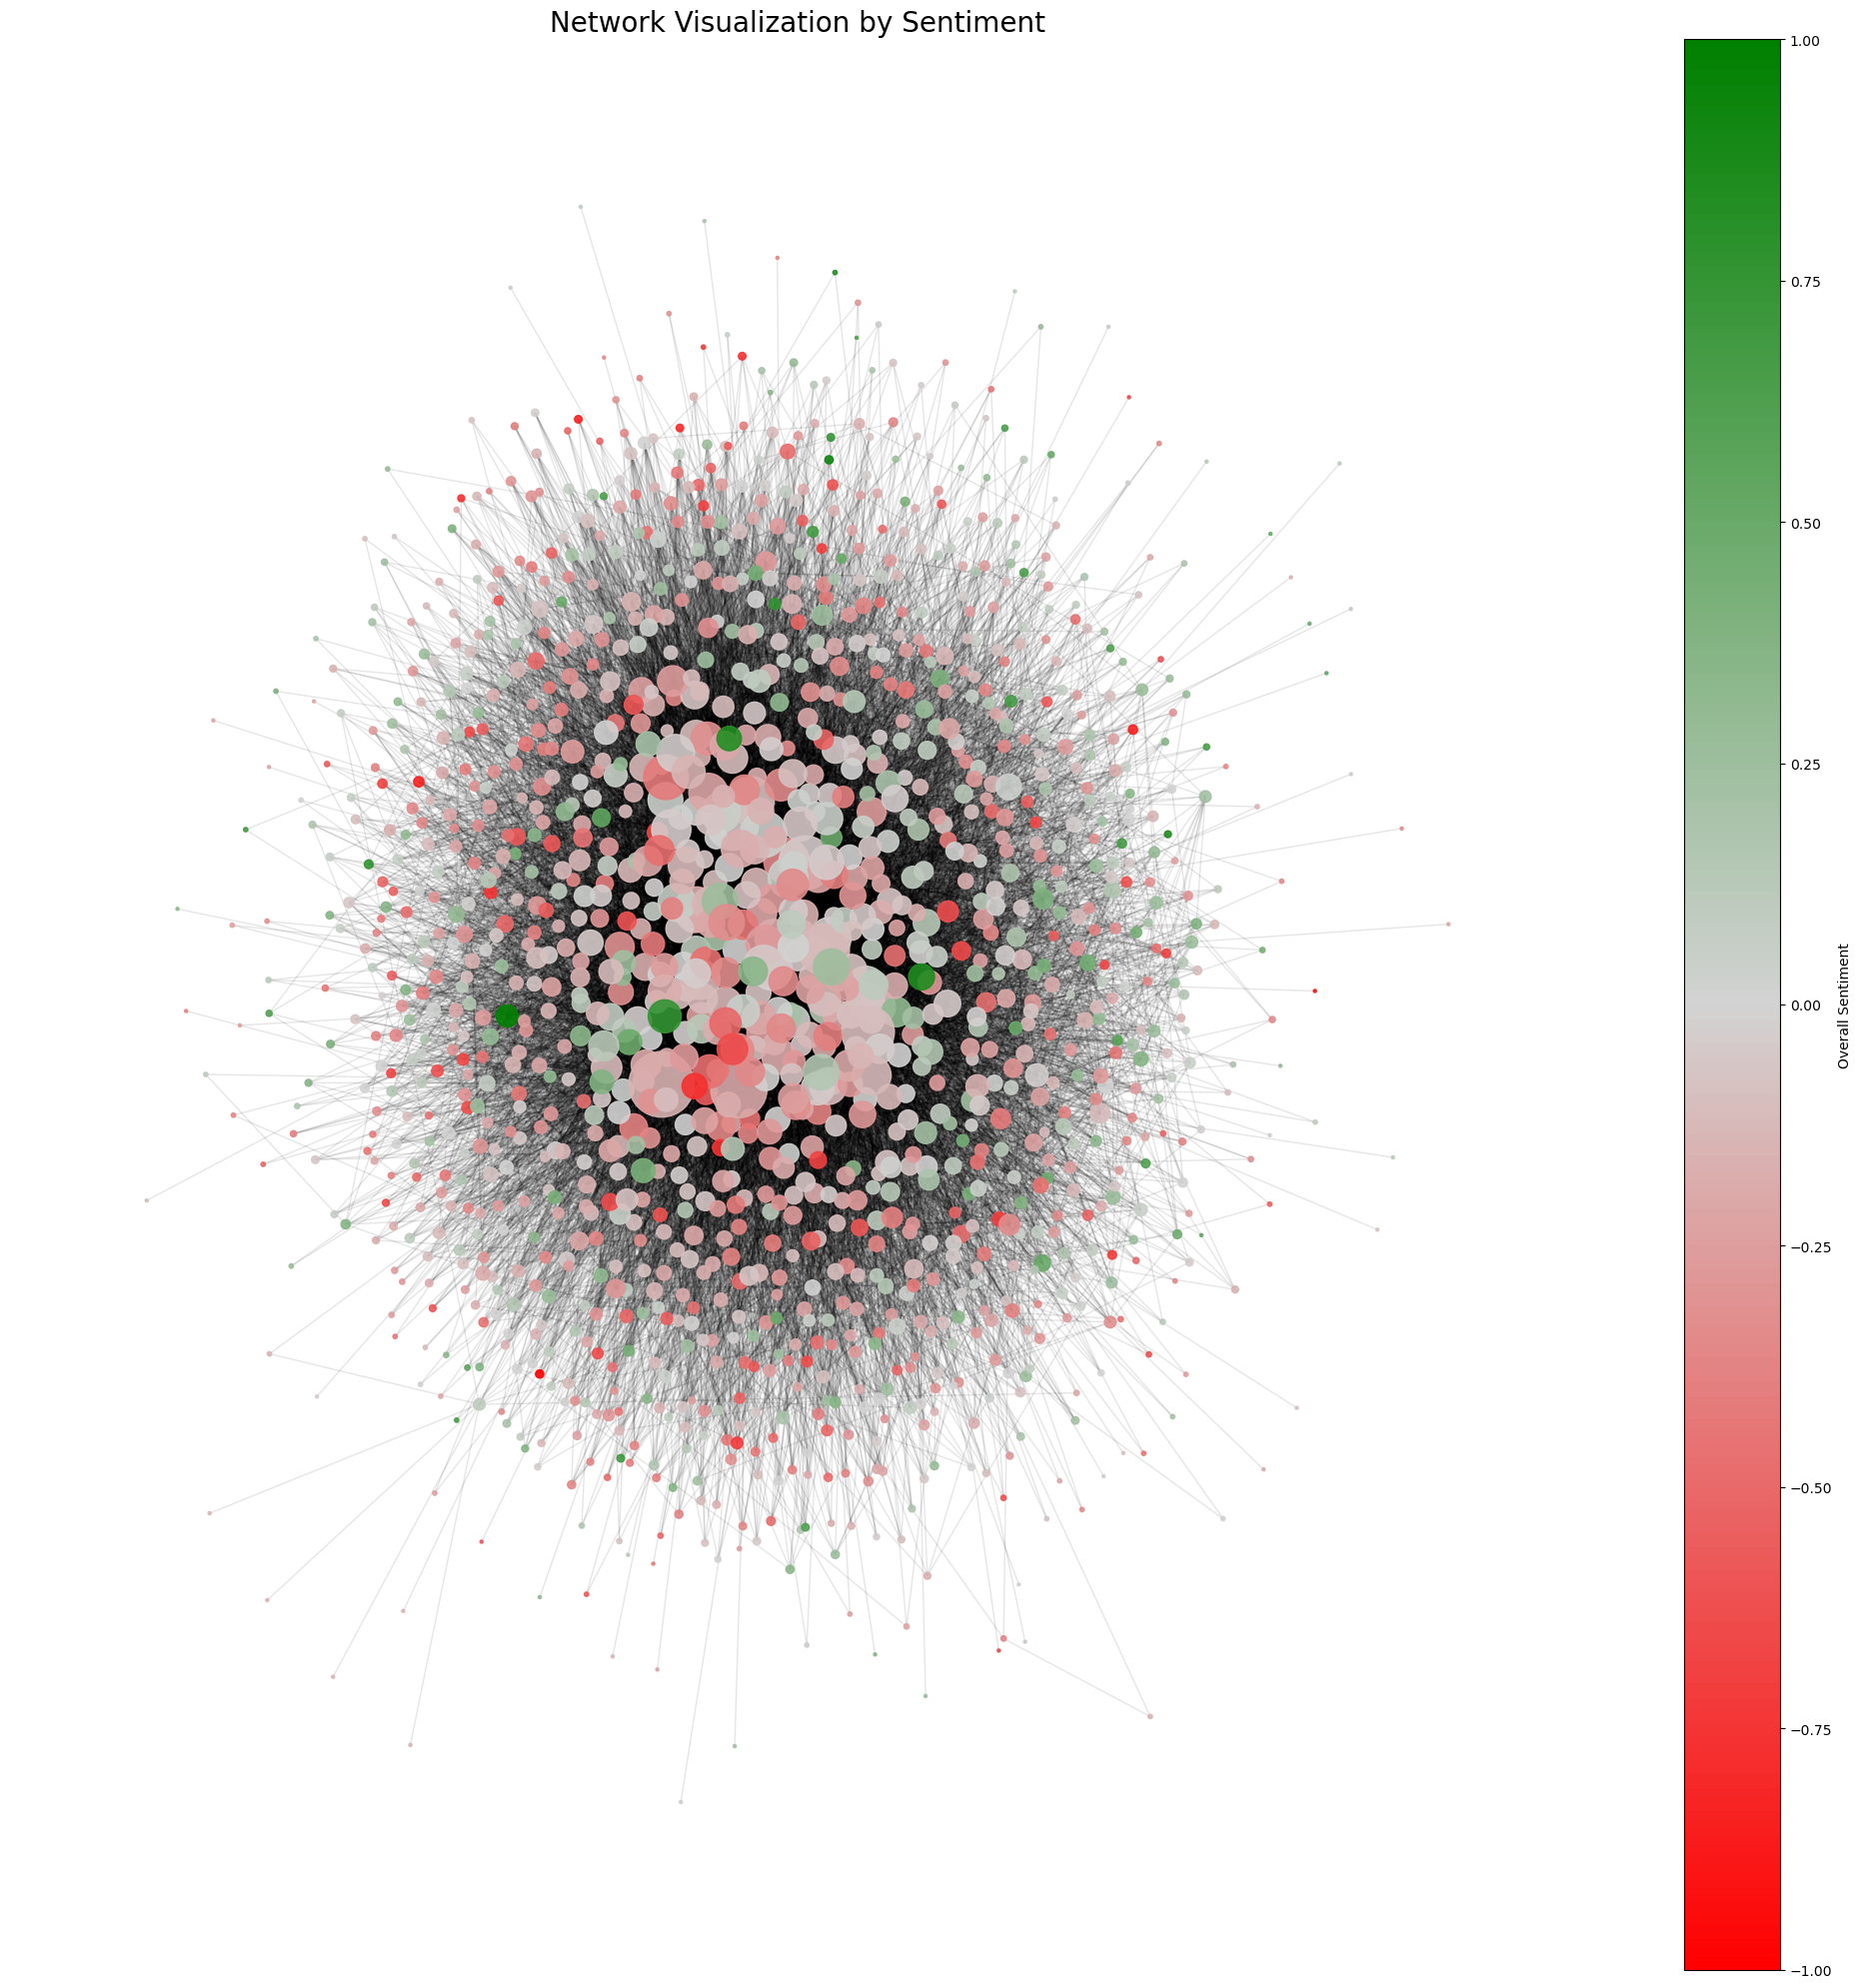

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import networkx as nx

# Convert to undirected graph for visualization
G_undirected = G.to_undirected()

# Extract the overall sentiment from the 'overall_sentiment' node attribute
# Default to 0.0 if the sentiment is not available
sentiments = {
    node: data.get("overall_sentiment", 0.0)
    for node, data in G_undirected.nodes(data=True)
}

# Normalize sentiment values for coloring
norm = mcolors.Normalize(vmin=-1, vmax=1)  # Sentiment range is -1 to 1
normalized_sentiments = list(sentiments.values())  # Extract sentiment values

# Use a custom colormap from red (negative) to light grey (neutral) to green (positive)
color_map = mcolors.LinearSegmentedColormap.from_list("sentiment_map", ["red", "lightgrey", "green"])

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))  # Create figure and axes
pos = nx.kamada_kawai_layout(G_undirected)  # Kamada-Kawai layout for better spacing

# Node sizes based on degree
node_sizes = [d * 5 for d in dict(G_undirected.degree()).values()]  # Scale by 5 for visibility

# Draw nodes with the custom red-grey-green colormap
nodes = nx.draw_networkx_nodes(
    G_undirected, pos,
    node_size=node_sizes,
    node_color=normalized_sentiments,
    cmap=color_map,
    alpha=0.9,  # Increase alpha for better visibility
    ax=ax
)

# Draw edges
nx.draw_networkx_edges(G_undirected, pos, alpha=0.1, ax=ax)

# Add a colorbar to show the mapping of sentiment to color
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Overall Sentiment', orientation='vertical')

# Title and layout adjustments
ax.set_title("Network Visualization by Sentiment", fontsize=20)
plt.axis('off')
plt.tight_layout()

# Display the plot
plt.show()


Visualizes users' overall sentiment in the network with nodes colors ranging from red (negative) to green (positive). Node sizes are proportional to their degree. A colorbar provides a visual reference for sentiment values.

# Load libraries

In [ ]:
# Standard library imports
import json
import re
import time
from collections import Counter, defaultdict
from datetime import datetime, timedelta
import random

# Third party imports
import numpy as np
import pandas as pd
import torch

# Data processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from tqdm import tqdm

# Network analysis
import networkx as nx
from fa2_modified import ForceAtlas2
import community.community_louvain as community_louvain

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.dates import DateFormatter
from wordcloud import WordCloud

# API and web
import praw
from prawcore.exceptions import TooManyRequests
import requests
from alpha_vantage.timeseries import TimeSeries

# Machine Learning
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    BertTokenizer,
    BertForSequenceClassification,
    pipeline
)

# Setting Dataframe 

In [211]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)       # Expand display width to show more content

# Scrape stocks reddit

This script analyzes the most mentioned stock tickers on a specific subreddit 'stocks' over a specified time period. It initializes a connection to the Reddit API using the PRAW library and defines variables for the subreddit name, post limits, year limit, and file paths. The script loads a list of valid NASDAQ tickers from a file and defines helper functions to check if a post is within the specified year limit, scrape posts to identify the top 100 most mentioned tickers, and fetch posts and comments for each top ticker. 

In [ ]:


# Initialize Reddit API connection
reddit = praw.Reddit(
    client_id="xcyz_GEqTxFt5HOeF-kLAQ",  
    client_secret="89KBEDTYUm55hK_tR2JWwqV25d9ZhA", 
    user_agent="user_interaction_network (by u/Virtual_Neat_6192)"
)

# Variables
SUBREDDIT_NAME = 'stocks'
POST_LIMIT = 10000  # Initial limit to identify tickers
POSTS_PER_TICKER = 10000  # Limit of posts per ticker
YEAR_LIMIT = 10  # Limit for posts in years
OUTPUT_FILE = "/Users/Thomas/Desktop/Skole/Business Analytics/Social Graphs/Stocks_user_interactionsv3.json"
NASDAQ_TICKERS_FILE = "/Users/Thomas/Desktop/Skole/Business Analytics/Social Graphs/nasdaq_tickers.txt"
MAX_REQUEST_SLEEP = 60  # Sleep time if rate-limited (in seconds)

# Regex pattern for valid tickers (all uppercase, 1-5 characters)
ticker_pattern = re.compile(r'\b[A-Z]{3,5}\b')

# Load NASDAQ tickers from file
def load_nasdaq_tickers(file_path):
    with open(file_path, 'r') as f:
        return set(line.strip() for line in f)

nasdaq_tickers = load_nasdaq_tickers(NASDAQ_TICKERS_FILE)

# Function to check if a post is within the specified year limit
def is_within_year_limit(timestamp, year_limit):
    post_date = datetime.fromtimestamp(timestamp)
    year_cutoff = datetime.now() - timedelta(days=365 * year_limit)
    return post_date >= year_cutoff

# Function to scrape posts and identify tickers from titles
def get_top_tickers(subreddit_name, post_limit, year_limit, valid_tickers):
    ticker_counter = Counter()

    try:
        for submission in reddit.subreddit(subreddit_name).new(limit=post_limit):
            # Check if the post is within the specified year limit
            if not is_within_year_limit(submission.created_utc, year_limit):
                continue

            # Extract tickers from post titles and filter against NASDAQ tickers
            title_tickers = [ticker for ticker in ticker_pattern.findall(submission.title) if ticker in valid_tickers]
            ticker_counter.update(title_tickers)

    except TooManyRequests:
        print(f"Too many requests, sleeping for {MAX_REQUEST_SLEEP} seconds...")
        time.sleep(MAX_REQUEST_SLEEP)

    # Get the top 100 most mentioned tickers
    return [ticker for ticker, _ in ticker_counter.most_common(100)]

# Function to fetch posts and comments for a ticker
def get_posts_for_ticker(ticker, posts_per_ticker, year_limit):
    collected_posts = []

    try:
        count = 0
        for submission in reddit.subreddit(SUBREDDIT_NAME).search(ticker, sort='new', limit=2000):
            if count >= posts_per_ticker:
                break

            # Check if the post is within the specified year limit
            if not is_within_year_limit(submission.created_utc, year_limit):
                continue

            # Collect post metadata
            submission.comments.replace_more(limit=0)
            all_comments = submission.comments.list()

            comments = [comment.body for comment in all_comments]
            usernames = [comment.author.name if comment.author else "Deleted" for comment in all_comments]

            post_data = {
                "ticker": ticker,
                "title": submission.title,
                "selftext": submission.selftext,
                "author": submission.author.name if submission.author else "Deleted",
                "timestamp": submission.created_utc,
                "url": submission.url,
                "comments": comments,
                "usernames": usernames
            }
            collected_posts.append(post_data)
            count += 1

            # Sleep briefly to avoid rate limits
            time.sleep(0)

    except TooManyRequests:
        print(f"Too many requests, sleeping for {MAX_REQUEST_SLEEP} seconds...")
        time.sleep(MAX_REQUEST_SLEEP)

    return collected_posts

# Main process
print("Starting to scrape subreddit...")
top_tickers = get_top_tickers(SUBREDDIT_NAME, POST_LIMIT, YEAR_LIMIT, nasdaq_tickers)
print(f"Top 100 tickers identified: {top_tickers}")

all_data = []
for ticker in top_tickers:
    print(f"Fetching posts for ticker: {ticker}")
    posts = get_posts_for_ticker(ticker, POSTS_PER_TICKER, YEAR_LIMIT)
    all_data.extend(posts)

# Save the collected data to a JSON file
with open(OUTPUT_FILE, 'w') as json_file:
    json.dump(all_data, json_file, indent=4)

print(f"Data saved to {OUTPUT_FILE}")

# Process data

Processes posts and comments, assigns attributes like comment length, stocks mentioned, and timestamps. It is saved as a JSON file for analysis of sentiment, influence, and network dynamics.

In [84]:
import networkx as nx
import json
from collections import defaultdict, Counter
from datetime import datetime

# File paths
input_file = "/Users/Thomas/Desktop/Skole/Business Analytics/Social Graphs/Stocks_user_interactionsv2.json"
ticker_file = "/Users/Thomas/Desktop/Skole/Business Analytics/Social Graphs/nasdaq_tickers.txt"
output_file = "/Users/Thomas/Desktop/Skole/Business Analytics/Social Graphs/network_with_attributesv4.json"

# Parameters
NUM_UNIQUE_USERS = 1500  # Top N users to include
EXCLUDED_USERS = {"AutoModerator", "Deleted", "RemindMeBot"}  # Excluded users

# Load the dataset
with open(input_file, "r") as file:
    data = json.load(file)

# Load valid tickers
with open(ticker_file, "r") as tf:
    valid_tickers = set(line.strip() for line in tf if line.strip())

# Step 1: Count user activity
user_activity = Counter()
for record in data:
    usernames = record.get("usernames", [])
    for user in usernames:
        if user not in EXCLUDED_USERS:
            user_activity[user] += 1

# Select the top NUM_UNIQUE_USERS active users
top_users = {user for user, _ in user_activity.most_common(NUM_UNIQUE_USERS)}
print(f"Selected {len(top_users)} most active users after excluding {EXCLUDED_USERS}.")

# Step 2: Initialize data structures
user_to_stocks = defaultdict(set)  # Map users to stocks
edges = []  # List to store edges (reply relationships)
subset_data = defaultdict(lambda: {
    "stocks": set(),
    "all_comments": [],  # Collect all comments (without timestamps)
    "comments_by_stock": defaultdict(list),  # Store comments with timestamps by stock
    "timestamps_by_stock": defaultdict(list),
    "post_titles": [],
    "post_texts": [],
})

# Function to format timestamps into a readable date format
def format_timestamp(timestamp):
    try:
        return datetime.utcfromtimestamp(timestamp).isoformat()
    except (ValueError, TypeError):
        return None

# Step 3: Process the dataset
for record in data:
    ticker = record["ticker"]  # Stock mentioned in the post
    usernames = record.get("usernames", [])  # All users involved (post author and commenters)
    comments = record.get("comments", [])  # Comments in the post
    timestamp = record["timestamp"]
    title = record.get("title", "")
    post_text = record.get("selftext", "")

    # Filter only top users
    filtered_users = [user for user in usernames if user in top_users and user not in EXCLUDED_USERS]

    # All users in comments are associated with the stock mentioned in the post
    for user in filtered_users:
        user_to_stocks[user].add(ticker)

    # Process comments for preprocessed attributes
    for comment, user in zip(comments, filtered_users):
        mentioned_stocks = {word for word in comment.split() if word.isupper() and len(word) <= 5}
        mentioned_stocks.add(ticker)  # Include the stock from the post
        valid_stocks = {stock for stock in mentioned_stocks if stock in valid_tickers}

        # Add preprocessed data
        subset_data[user]["all_comments"].append(comment)  # Store all comments (no timestamps)
        for stock in valid_stocks:
            subset_data[user]["comments_by_stock"][stock].append({
                "comment": comment,
                "timestamp": format_timestamp(timestamp)  # Convert timestamp to readable date format
            })
            subset_data[user]["timestamps_by_stock"][stock].append(format_timestamp(timestamp))
        subset_data[user]["stocks"].update(valid_stocks)
        subset_data[user]["post_titles"].append(title)
        if usernames[0] == user:  # If the user created the post
            subset_data[user]["post_texts"].append(post_text)

    # Create edges (reply relationships)
    if filtered_users:
        post_author = filtered_users[0]  # First user is the post author
        for user in filtered_users[1:]:
            edges.append((post_author, user))  # Add edge (post_author -> commenter)

# Step 4: Build the network
G = nx.DiGraph()
G.add_edges_from(edges)
G.remove_edges_from(nx.selfloop_edges(G))

# Add nodes with attributes
for user, stocks in user_to_stocks.items():
    G.add_node(user, stocks=list(stocks))  # Add node attributes

# Remove isolated nodes
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Extract the largest weakly connected component
largest_weakly_connected = max(nx.weakly_connected_components(G), key=len)
largest_subgraph = G.subgraph(largest_weakly_connected).copy()

# Step 5: Add preprocessed attributes to the graph nodes
for user, data in subset_data.items():
    if user in largest_subgraph.nodes:
        # Calculate content length for each user based on the 'all_comments' attribute
        content_length = sum(len(comment) for comment in data["all_comments"])

        # Ensure that content_length is assigned to each node correctly
        nx.set_node_attributes(largest_subgraph, {user: {"content_length": content_length}})

        # Add other node attributes, including stocks and comments
        nx.set_node_attributes(largest_subgraph, {
            user: {
                "stocks": list(data["stocks"]),
                "all_comments": data["all_comments"],  # Include all comments without timestamps
                "comments_by_stock": dict(data["comments_by_stock"]),  # Include comments with timestamps
                "timestamps_by_stock": dict(data["timestamps_by_stock"]),  # Add timestamps by stock
                "post_titles": data["post_titles"],
                "post_texts": data["post_texts"],
            }
        })

# Step 6: Save the network with attributes to a JSON file
final_data = {
    "nodes": {node: attrs for node, attrs in largest_subgraph.nodes(data=True)},
    "edges": list(largest_subgraph.edges(data=True)),
}

with open(output_file, "w") as outfile:
    json.dump(final_data, outfile, indent=4)

print(f"Network with attributes saved to {output_file}.")

Selected 1500 most active users after excluding {'Deleted', 'AutoModerator', 'RemindMeBot'}.


/var/folders/h9/b0m54z_x70z3xs93z4k09jwc0000gn/T/ipykernel_99752/69163272.py:50: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.utcfromtimestamp(timestamp).isoformat()


Network with attributes saved to /Users/Thomas/Desktop/Skole/Business Analytics/Social Graphs/network_with_attributesv4.json.


Calculates "sentiment_score" using FinBERT for each comment, "stock sentiment score" for each stock and "overall_sentiment" for each user. Adds it to the JSON file.

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the FinBERT model and tokenizer
model_name = 'yiyanghkust/finbert-tone'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name).to(device)
model.eval()

# Function to calculate sentiment scores in batches
def calculate_sentiment_score(comments, batch_size=16):
    sentiments = []
    valid_comments = [comment for comment in comments if comment != "[deleted]"]
    for i in range(0, len(valid_comments), batch_size):
        batch = valid_comments[i:i + batch_size]
        # Tokenize and move inputs to the same device as the model
        inputs = tokenizer(batch, return_tensors="pt", truncation=True, padding=True, max_length=512)
        inputs = {key: value.to(device) for key, value in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        logits = outputs.logits.cpu().numpy()  # Move logits back to CPU for processing
        probabilities = softmax(logits, axis=1)
        # Positive probability minus negative probability
        batch_sentiments = probabilities[:, 1] - probabilities[:, 2]
        sentiments.extend(batch_sentiments)
    if sentiments:
        return float(np.mean(sentiments))  # Convert to standard Python float
    else:
        return 0.0

# Load the JSON data
with open('network_with_attributesv4.json', 'r') as file:
    data = json.load(file)

# Iterate through all nodes and calculate sentiment scores
for node_key, node_data in tqdm(data['nodes'].items(), desc="Processing nodes"):
    comments_by_stock = node_data.get("comments_by_stock", {})
    
    # Calculate sentiment for each stock
    for stock, comments_list in comments_by_stock.items():
        # Extract comments for the current stock
        comments = [item["comment"] for item in comments_list if "comment" in item]
        # Calculate stock-level sentiment score
        stock_sentiment_score = calculate_sentiment_score(comments)
        # Add stock sentiment score (renamed) to the stock
        comments_by_stock[stock].append({"stock_sentiment_score": stock_sentiment_score})
        
        # Calculate sentiment for each individual comment
        for comment_data in comments_list:
            if "comment" in comment_data:  # Check if "comment" key exists
                comment_text = comment_data["comment"]
                sentiment_score = calculate_sentiment_score([comment_text])  # Calculate sentiment for a single comment
                comment_data["sentiment_score"] = sentiment_score  # Add sentiment score after timestamp

    # Calculate overall sentiment for the node using "all_comments"
    all_comments = node_data.get("all_comments", [])
    overall_sentiment = calculate_sentiment_score(all_comments)
    
    # Add overall sentiment to the node
    node_data["overall_sentiment"] = overall_sentiment

# Save the updated JSON for all nodes to a new file
with open('network_with_attributesv6.json', 'w') as file:
    json.dump(data, file, indent=4)

print("Sentiment analysis for all nodes complete.")


Using device: cuda


Processing nodes: 100%|██████████| 1499/1499 [44:24<00:00,  1.78s/it] 


Sentiment analysis for all nodes complete.


# Construct Network

This code loads a JSON file to reconstruct a directed graph with edges and node attributes using NetworkX. It then identifies and extracts the largest weakly connected component, printing its size in nodes and edges.

In [7]:

# Path to the saved network file
saved_file = "network_with_attributesv6.json"

# Load the saved network file
with open(saved_file, "r") as infile:
    saved_data = json.load(infile)

# Reconstruct the graph
G = nx.DiGraph()
G.add_edges_from(saved_data["edges"])  # Add edges
nx.set_node_attributes(G, saved_data["nodes"])  # Add node attributes (corrected line)

# Verify the reconstructed graph
print(f"Reconstructed graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# Find the largest weakly connected component
largest_weakly_connected = max(nx.weakly_connected_components(G), key=len)
largest_subgraph = G.subgraph(largest_weakly_connected).copy()
print(f"Largest weakly connected component: {largest_subgraph.number_of_nodes()} nodes, {largest_subgraph.number_of_edges()} edges") 

Reconstructed graph: 1499 nodes, 20809 edges
Largest weakly connected component: 1499 nodes, 20809 edges


# Visualize network

This script visualizes a graph with nodes and edges, emphasizing the nodes’ content_length attribute using color intensity. Node colors are mapped to the content_length values, normalized and displayed using a reversed “Oranges” colormap. Node sizes reflect their degree, scaled for better visibility

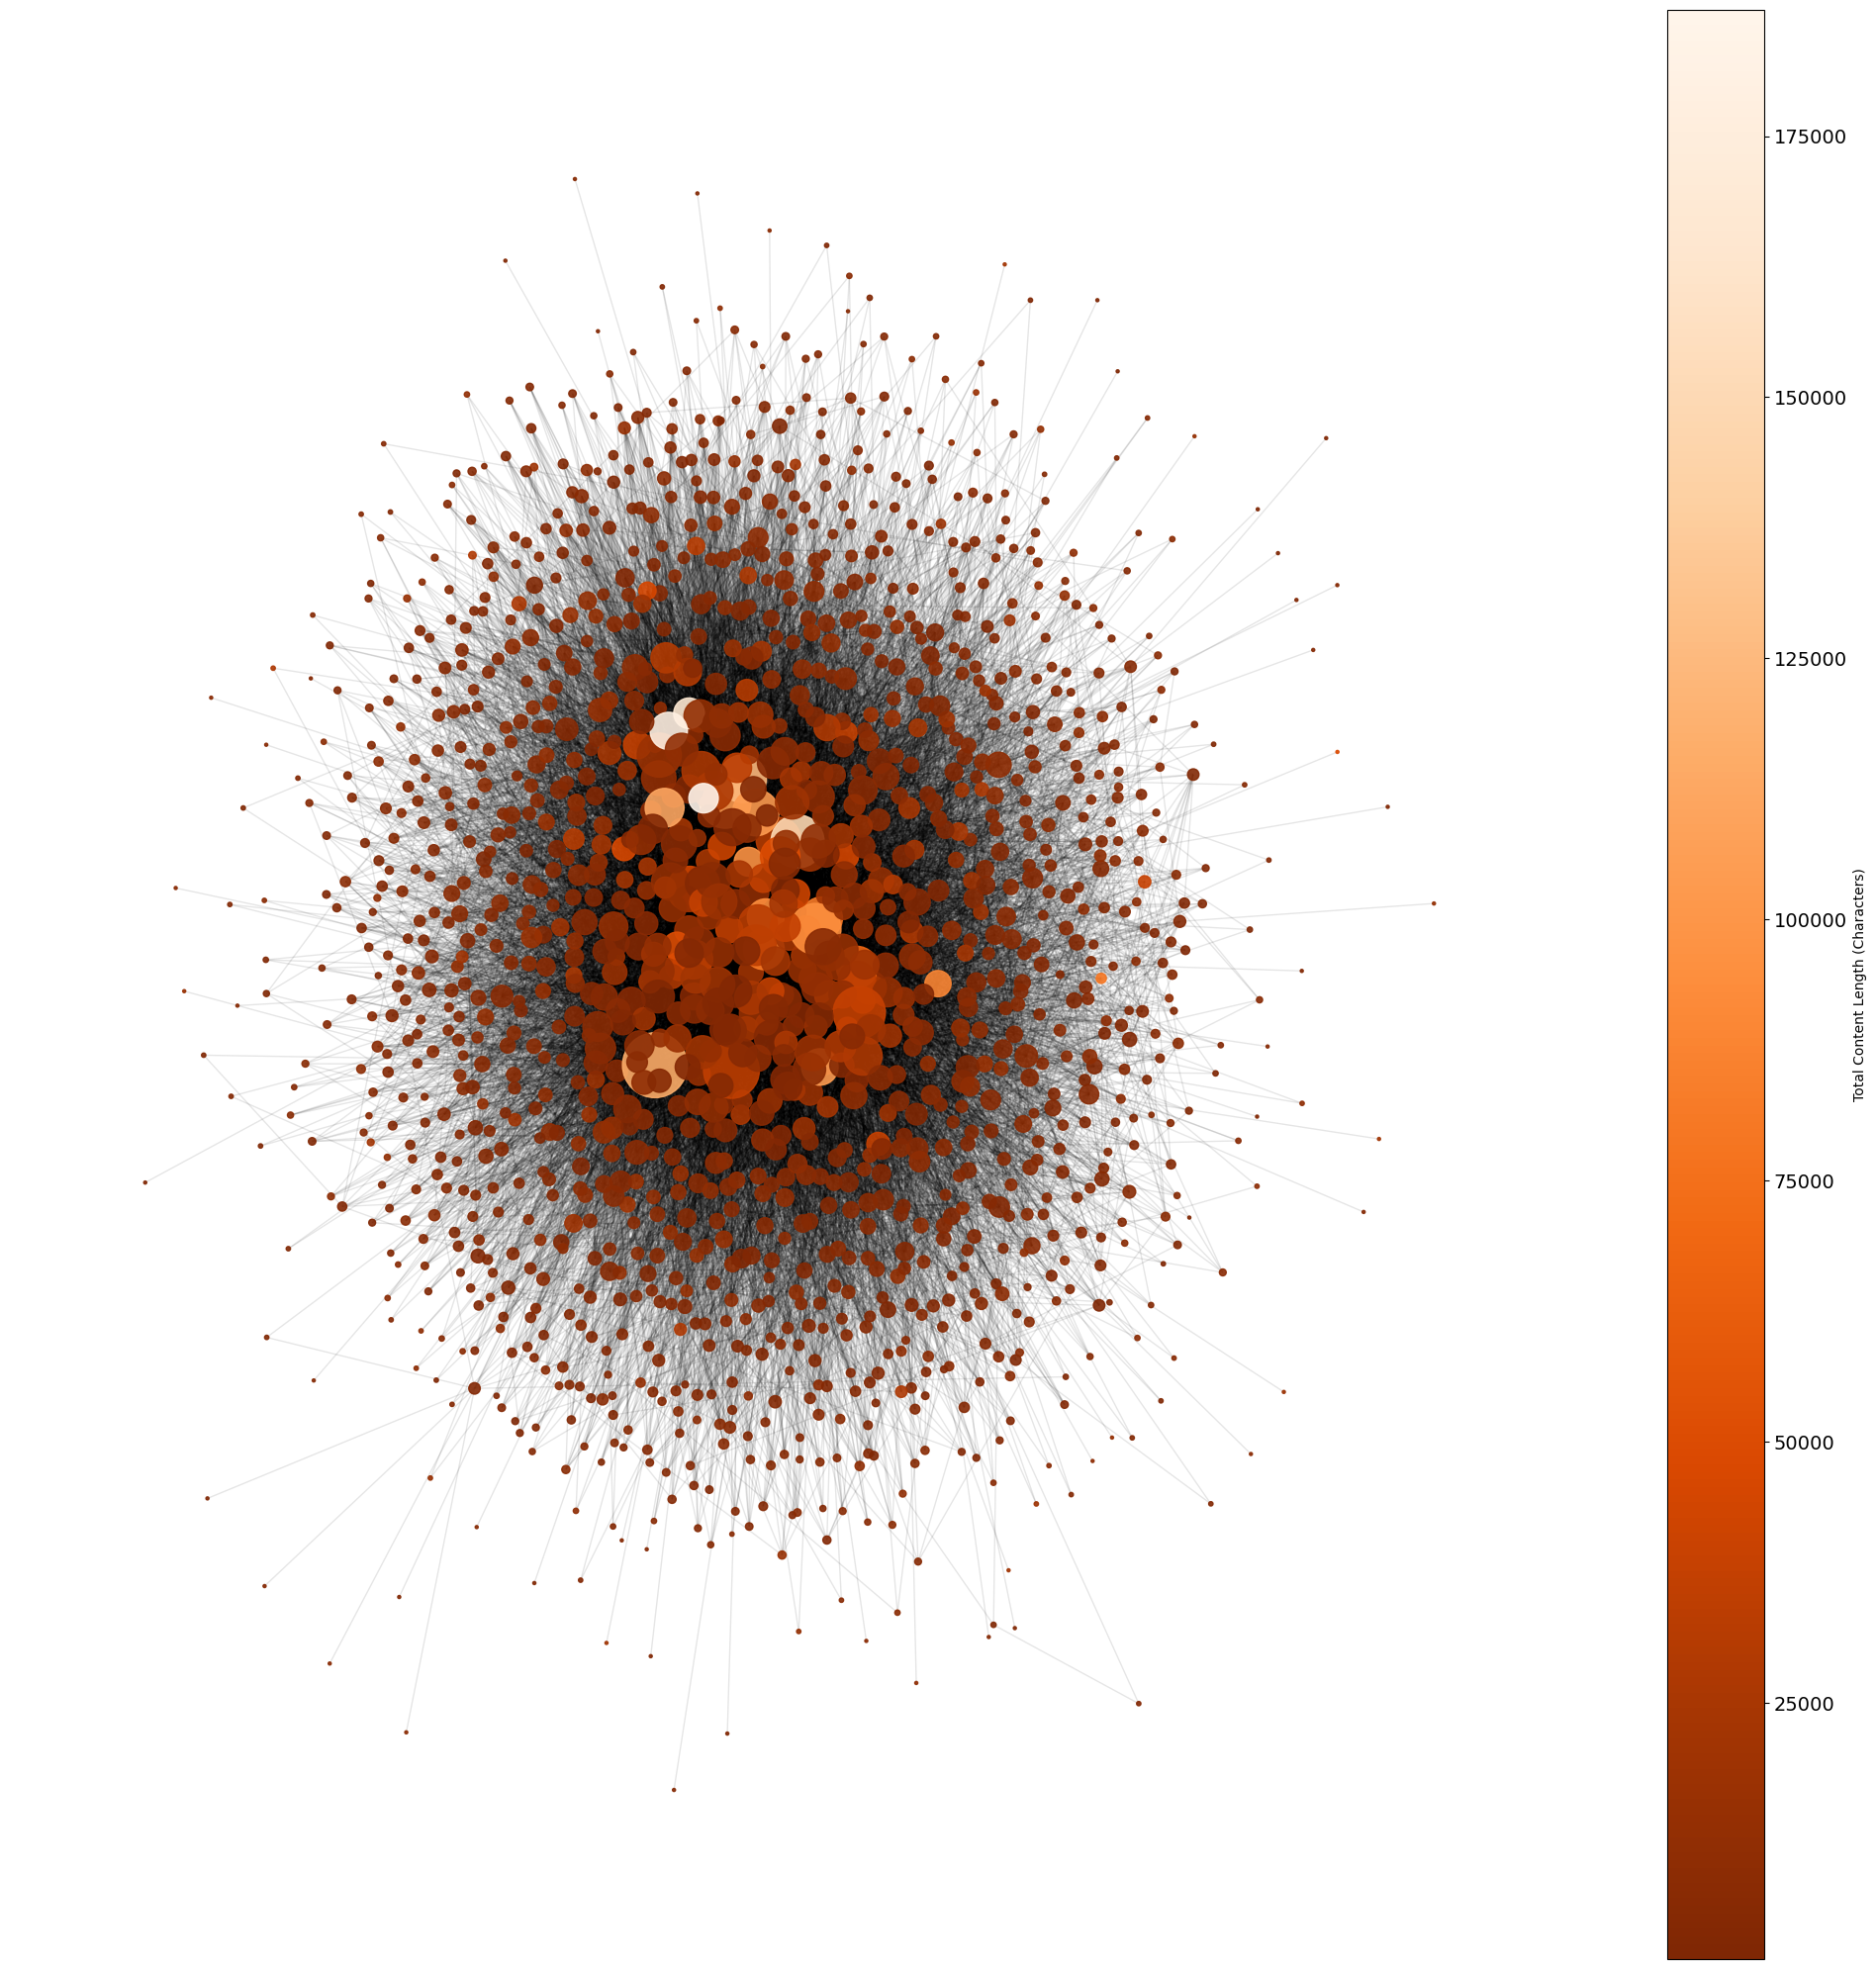

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import networkx as nx

# Assuming 'G' is already created and populated with nodes and their attributes.

# Convert to undirected graph
G_undirected = G.to_undirected()

# Extract the content length from the 'content_length' node attribute for all nodes
content_lengths = {
    node: data.get("content_length", 0)  # Default to 0 if content_length is not found
    for node, data in G_undirected.nodes(data=True)
}

# Normalize content lengths for coloring
norm = mcolors.Normalize(vmin=min(content_lengths.values()), vmax=max(content_lengths.values()))
normalized_lengths = list(content_lengths.values())  # Extract content length values

# Use the reversed 'Oranges' colormap
color_map = cm.Oranges_r

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))
pos = nx.kamada_kawai_layout(G_undirected)  # Kamada-Kawai layout

# Node sizes based on degree
node_sizes = [d * 5 for d in dict(G_undirected.degree()).values()]  # Scale by 5 for visibility

# Draw nodes with the reversed 'Oranges' colormap
nodes = nx.draw_networkx_nodes(
    G_undirected, pos,
    node_size=node_sizes,
    node_color=normalized_lengths,
    cmap=color_map,
    alpha=0.9,
    ax=ax
)

# Draw edges
nx.draw_networkx_edges(G_undirected, pos, alpha=0.1, ax=ax)

# Add a colorbar with larger tick labels
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Total Content Length (Characters)', orientation='vertical')
cbar.ax.tick_params(labelsize=14)  # Increase the tick label size

# Remove the title
# ax.set_title("Network Visualization by Content Length", fontsize=20)  # Removed this line

plt.axis('off')
plt.tight_layout()
plt.show()

## In-degree and Out-degree distribution

 Visualizes the in-degree and out-degree distributions of a directed graph on a log-log scale. It highlights that the distributions follow power law distribution.

Visualizing In-Degree Distribution...


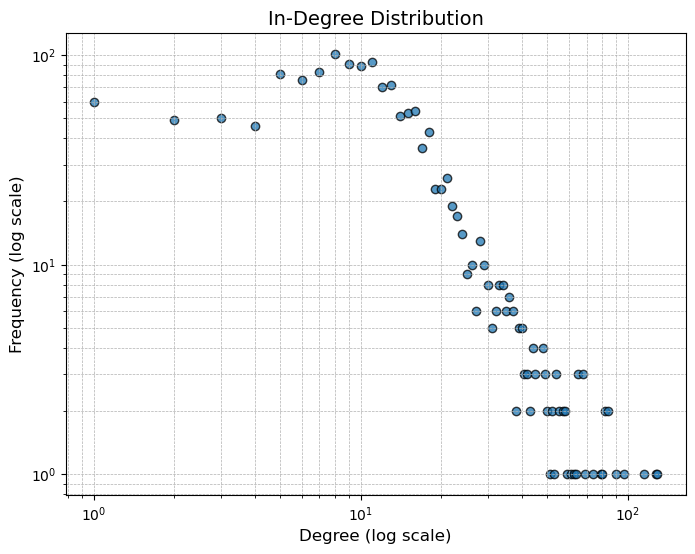

Visualizing Out-Degree Distribution...


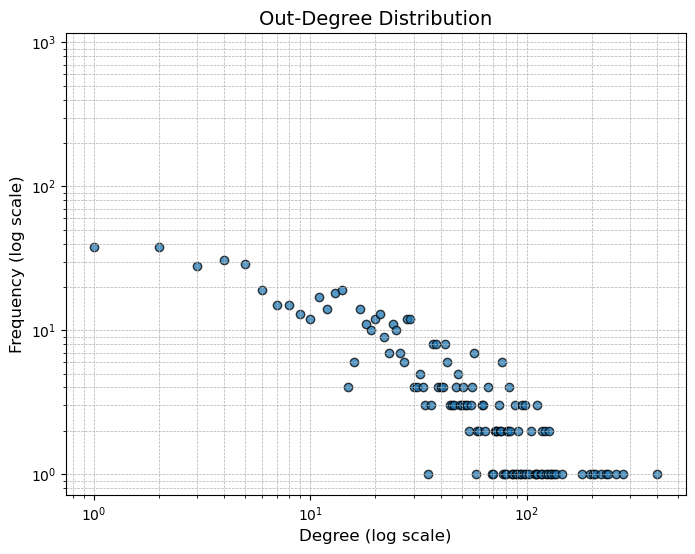

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Function to plot degree distribution
def plot_degree_distribution(graph, degree_type="in"):
    """
    Plot the degree distribution for a directed graph.

    Args:
        graph (networkx.DiGraph): The directed graph.
        degree_type (str): "in" for in-degree or "out" for out-degree distribution.

    """
    # Get degree data
    if degree_type == "in":
        degree_sequence = [d for _, d in graph.in_degree()]
        title = "In-Degree Distribution"
    elif degree_type == "out":
        degree_sequence = [d for _, d in graph.out_degree()]
        title = "Out-Degree Distribution"
    else:
        raise ValueError("degree_type must be 'in' or 'out'")

    # Count frequency of each degree
    degree_count = np.bincount(degree_sequence)
    degrees = np.arange(len(degree_count))

    # Filter out zero frequencies for log-log plot
    nonzero_degrees = degrees[degree_count > 0]
    nonzero_counts = degree_count[degree_count > 0]

    # Plot on log-log scale
    plt.figure(figsize=(8, 6))
    plt.scatter(nonzero_degrees, nonzero_counts, alpha=0.75, edgecolor='k')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree (log scale)', fontsize=12)
    plt.ylabel('Frequency (log scale)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Assuming `G` is your directed graph
if nx.is_directed(G):
    print("Visualizing In-Degree Distribution...")
    plot_degree_distribution(G, degree_type="in")

    print("Visualizing Out-Degree Distribution...")
    plot_degree_distribution(G, degree_type="out")
else:
    print("The graph is not directed. This script requires a directed graph.")


# Network metrics

## Eigenvector centrality

In [217]:
 #Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(largest_subgraph, max_iter=1000)

# Sort users by eigenvector centrality and select the top 5
top_5_users = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 users and their centrality scores
print("\nTop 5 Users with Highest Eigenvector Centrality:")
for user, centrality in top_5_users:
    print(f"User: {user}: {centrality:.4f}")


Top 5 Users with Highest Eigenvector Centrality:
User: 95Daphne: 0.1553
User: Vast_Cricket: 0.1399
User: ShadowLiberal: 0.1386
User: creemeeseason: 0.1227
User: FarrisAT: 0.1174


The top 5 users with the highest eigenvector centrality, indicating their influence within the network. Higher values suggest these users are well-connected to other influential nodes, highlighting their central role in the network

## betweeness Centrality 

In [220]:
# Normalize=True ensures values are in range [0, 1]
betweenness_centrality = nx.betweenness_centrality(largest_subgraph, normalized=True, weight=None)

# Step 4: Sort the nodes by their betweenness centrality
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Step 5: Display the top 10 nodes with highest betweenness centrality
print("\nTop 5 Nodes by Betweenness Centrality:")
for i, (node, centrality) in enumerate(sorted_betweenness[:5], start=1):
    print(f"{i}. Node: {node}, Betweenness Centrality: {centrality:.4f}")

# Optional: Store betweenness centrality as a node attribute in the graph
nx.set_node_attributes(largest_subgraph, betweenness_centrality, "betweenness_centrality")


Top 5 Nodes by Betweenness Centrality:
1. Node: Didntlikedefaultname, Betweenness Centrality: 0.0372
2. Node: dvdmovie1, Betweenness Centrality: 0.0246
3. Node: JRshoe1997, Betweenness Centrality: 0.0227
4. Node: FarrisAT, Betweenness Centrality: 0.0224
5. Node: creemeeseason, Betweenness Centrality: 0.0213


This output identifies the top 5 nodes by betweenness centrality, a measure of how often a node acts as a bridge in the shortest paths between other nodes. Higher values indicate these nodes play a key role in connecting different parts of the network

## Top 5 with most in and out-degree

In [7]:
# Assuming 'G' is your directed graph
if nx.is_directed(G):
    # Get the in-degree and out-degree for each node
    in_degrees = G.in_degree()
    out_degrees = G.out_degree()

    # Sort nodes by in-degree and out-degree in descending order
    top_in_degrees = sorted(in_degrees, key=lambda x: x[1], reverse=True)[:5]
    top_out_degrees = sorted(out_degrees, key=lambda x: x[1], reverse=True)[:5]

    print("Top 5 nodes with the highest in-degrees:")
    for i, (node, degree) in enumerate(top_in_degrees, 1):
        print(f"{i}. Node: {node}, In-Degree: {degree}")

    print("\nTop 5 nodes with the highest out-degrees:")
    for i, (node, degree) in enumerate(top_out_degrees, 1):
        print(f"{i}. Node: {node}, Out-Degree: {degree}")
else:
    print("The graph is not directed. Please ensure you use a directed graph to compute in-degrees and out-degrees.")

Top 5 nodes with the highest in-degrees:
1. Node: ShadowLiberal, In-Degree: 129
2. Node: Vast_Cricket, In-Degree: 127
3. Node: 95Daphne, In-Degree: 115
4. Node: FarrisAT, In-Degree: 97
5. Node: bartturner, In-Degree: 90

Top 5 nodes with the highest out-degrees:
1. Node: Didntlikedefaultname, Out-Degree: 401
2. Node: notreallydeep, Out-Degree: 278
3. Node: creemeeseason, Out-Degree: 257
4. Node: dvdmovie1, Out-Degree: 236
5. Node: JRshoe1997, Out-Degree: 232


This output identifies the top 5 nodes with the most incoming connections (in-degrees) and outgoing connections (out-degrees). High in-degrees suggest key receivers of interactions, while high out-degrees indicate major initiators of activity in the network

## Extract links from to users

This code defines a function to extract posts and their counts for a given list of users from the graph’s node data. It then uses this function to collect post details (count and content) for the top users by in-degree and out-degree. The results are combined into a dictionary for easy access and analysis

In [154]:
# Function to extract posts and post count from a list of nodes
def extract_posts_with_count(users, graph):
    user_posts = {}
    for user, _ in users:  # Iterate through the list of users and their degrees
        node_data = graph.nodes.get(user, {})  # Get the node's data
        post_texts = node_data.get("post_texts", [])  # Extract 'post_texts' or an empty list if not found
        user_posts[user] = {
            "post_count": len(post_texts),
            "post_texts": post_texts,
        }
    return user_posts

# Extract posts and counts for the top users by in-degree and out-degree
top_in_degree_data = extract_posts_with_count(top_in_degrees, G)
top_out_degree_data = extract_posts_with_count(top_out_degrees, G)

# Combine the results into a dictionary
top_users_data = {
    "Top In-Degree Users": top_in_degree_data,
    "Top Out-Degree Users": top_out_degree_data,
}


#pprint.pprint(top_users_data)

This code defines functions to extract URLs from user posts and applies them to the top in-degree and out-degree users. It begins by identifying URLs in the text content of user posts using regex, then aggregates these links for each user

In [155]:
import re
from collections import defaultdict

# Function to extract links from a user's posts
def extract_links_from_user_posts(user_name, data):
    """
    Extracts links from the posts of the specified user.

    Args:
        user_name (str): The username to check.
        data (dict): The JSON data containing the posts.

    Returns:
        list: A list of extracted URLs from the user's posts.
    """
    links = []
    user_data = data["nodes"].get(user_name, {})
    if "post_texts" in user_data:
        posts = user_data["post_texts"]
        for post in posts:
            # Find all URLs in the post text
            urls = re.findall(r'https?://\S+', post)
            links.extend(urls)
    return links

# Function to extract links for a list of users
def extract_links_from_users(users_data, graph_data):
    """
    Extracts links for all users in the input dictionary.

    Args:
        users_data (dict): Dictionary containing user data.
        graph_data (dict): JSON data of the network.

    Returns:
        dict: A dictionary with usernames as keys and a list of their extracted links as values.
    """
    user_links = defaultdict(list)
    for user in users_data.keys():
        user_links[user] = extract_links_from_user_posts(user, graph_data)
    return user_links

# Extract links for Top In-Degree Users and Top Out-Degree Users
top_users_links = {}

# Assuming `top_users_data` contains the relevant data
for category, users_data in top_users_data.items():
    print(f"Extracting links for {category}...")
    top_users_links[category] = extract_links_from_users(users_data, saved_data)

# Print results
for category, user_links in top_users_links.items():
    print(f"\nLinks found in {category}:")
    for user, links in user_links.items():
        if links:
            print(f"\nUser: {user}")
            for link in links:
                print(f"  {link}")
        else:
            print(f"User: {user} - No links found.")

Extracting links for Top In-Degree Users...
Extracting links for Top Out-Degree Users...

Links found in Top In-Degree Users:

User: ShadowLiberal
  https://www.bloomberg.com/news/articles/2024-10-09/us-says-it-s-weighing-google-breakup-as-remedy-in-monopoly-case
  https://www.bloomberg.com/news/articles/2024-10-09/us-says-it-s-weighing-google-breakup-as-remedy-in-monopoly-case
  https://www.bloomberg.com/news/articles/2024-10-09/us-says-it-s-weighing-google-breakup-as-remedy-in-monopoly-case
  https://www.cnbc.com/2024/07/30/meta-agrees-to-1point4-billion-settlement-in-texas-biometric-data-lawsuit.html

User: Vast_Cricket
  https://fred.stlouisfed.org/series/FEDFUNDS)
  https://fred.stlouisfed.org/series/FEDFUNDS)
User: 95Daphne - No links found.

User: FarrisAT
  https://www.cnbc.com/amp/2023/10/13/canon-launches-asml-challenge-with-machine-to-make-most-advanced-chips.html
  https://www.cnbc.com/amp/2023/10/13/canon-launches-asml-challenge-with-machine-to-make-most-advanced-chips.htm

Extracts post counts and URLs from the top users ranked by in-degree and out-degree in the graph. It identifies shared links using regular expressions, categorizing them by interaction type. The results provide insights into user activity levels and external resources shared within the network.

"creemeeseason" make sure to links to "rate my portfolio" and "Stocks Daily Discussion & Fundamentals". So he is a moderator that helps directs people to the correct threads

### Categorize and count based on links

This code processes the extracted links for top users and categorizes them based on predefined patterns for different categories such as “Finance,” “Social Media,” and “Technology.” Each link is matched against these patterns, and links that do not fit any category are labeled as “Other.” 

In [158]:
import re
from collections import defaultdict

# Define categories and their patterns
categories = {
    "Finance": ["bloomberg.com", "cnbc.com", "fred.stlouisfed.org"],
    "Social Media": ["reddit.com", "imgur.com"],
    "Technology": ["techcrunch.com", "wired.com", "arstechnica.com"],
    "Other": []  # Catch-all category for unclassified links
}

# Function to categorize a single link
def categorize_link(link, categories):
    for category, patterns in categories.items():
        if any(pattern in link for pattern in patterns):
            return category
    return "Other"  # Default category if no patterns match

# Function to categorize all links
def categorize_all_links(top_users_links, categories):
    categorized_links = defaultdict(lambda: defaultdict(int))  # Category counts per user

    for category, user_links in top_users_links.items():
        print(f"Categorizing links for {category}...")
        for user, links in user_links.items():
            for link in links:
                link_category = categorize_link(link, categories)
                categorized_links[user][link_category] += 1

    return categorized_links

# Process and categorize links
categorized_links = categorize_all_links(top_users_links, categories)

# Print the results
for user, category_counts in categorized_links.items():
    print(f"\nUser: {user}")
    for category, count in category_counts.items():
        print(f"  {category}: {count} links")

### Combine in and out degree metrics with links insights

In [148]:
# Compute in-degree and out-degree for all users
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Add in-degree and out-degree metrics to each node
for node in G.nodes:
    G.nodes[node]["in_degree"] = in_degrees.get(node, 0)
    G.nodes[node]["out_degree"] = out_degrees.get(node, 0)

# Add post count to each user
for node in G.nodes:
    post_texts = G.nodes[node].get("post_texts", [])
    G.nodes[node]["post_count"] = len(post_texts)

In [124]:
# Add post count to each user
for node in G.nodes:
    post_texts = G.nodes[node].get("post_texts", [])
    G.nodes[node]["post_count"] = len(post_texts)

In [149]:
import re
from collections import Counter

# Function to extract links from posts
def extract_links(posts):
    links = []
    for post in posts:
        links.extend(re.findall(r'https?://\S+', post))  # Extract all URLs from the post
    return links

# Add links and top domains to each user
for node in G.nodes:
    post_texts = G.nodes[node].get("post_texts", [])
    links = extract_links(post_texts)
    G.nodes[node]["links_shared"] = len(links)
    G.nodes[node]["top_domains"] = [
        domain for domain, count in Counter([url.split('/')[2] for url in links]).most_common(3)
    ]

In [174]:
import re
from collections import Counter
import pandas as pd

# Function to extract the domain from a link
def extract_domain(link):
    return re.findall(r'https?://([A-Za-z_0-9.-]+)', link)[0] if re.match(r'https?://', link) else "Unknown"

# Initialize a dictionary to store data for the DataFrame
metrics_data = {
    "User": [],
    "In-Degree": [],
    "Out-Degree": [],
    "Posts": [],
    "Links Shared": [],
    "Top Domains": []
}

# Initialize a dictionary to store domain counts for each user
domain_counts = {}

# Extract all unique domains from the links
unique_domains = set()
for user_links in top_users_links.values():
    for links in user_links.values():
        unique_domains.update([extract_domain(link) for link in links])

# Create a column for each unique domain
for domain in unique_domains:
    domain_counts[domain] = []

# Loop through top users and calculate their metrics
for node in G.nodes:
    if node not in top_users_set:
        continue  # Skip users not in the top users set

    # Add metrics for each user
    metrics_data["User"].append(node)
    metrics_data["In-Degree"].append(G.nodes[node].get("in_degree", 0))
    metrics_data["Out-Degree"].append(G.nodes[node].get("out_degree", 0))
    metrics_data["Posts"].append(G.nodes[node].get("post_count", 0))
    metrics_data["Links Shared"].append(G.nodes[node].get("links_shared", 0))
    metrics_data["Top Domains"].append(", ".join(G.nodes[node].get("top_domains", [])))

    # Get links for the user
    user_links = top_users_links.get("Top In-Degree Users", {}).get(node, []) + \
                 top_users_links.get("Top Out-Degree Users", {}).get(node, [])

    # Count domains for the user's links
    user_domain_counts = Counter([extract_domain(link) for link in user_links])

    # Fill in domain columns
    for domain in unique_domains:
        domain_counts[domain].append(user_domain_counts.get(domain, 0))

# Merge metrics_data and domain_counts into a single DataFrame
metrics_data.update(domain_counts)
top_users_df = pd.DataFrame(metrics_data)



Creates dataframe of interaction metrics (in-degree, out-degree, post count, links shared) and extracts top domains from shared links and computes their frequencies.

In [175]:
top_users_df.head(10)

User  In-Degree  Out-Degree  Posts  Links Shared  \
0          Vast_Cricket        127          71      6             2   
1            bartturner         90         112      9            52   
2         creemeeseason         84         257     30           181   
3         ShadowLiberal        129          60     15             4   
4              95Daphne        115          32      0             0   
5             dvdmovie1         84         236     27           100   
6            JRshoe1997         80         232      8             3   
7              FarrisAT         97         207     20           219   
8         notreallydeep         68         278     28             4   
9  Didntlikedefaultname         79         401    108           139   

                                         Top Domains  www.boots-uk.com  \
0                                fred.stlouisfed.org                 0   
1  imgur.com, www.billboard.com, www.grandviewres...                 0   
2  www.reddit.com, www.investopedia.com, www.stre...                 0   
3                    www.bloomberg.com, www.cnbc.com                 0   
4                                                                    0   
5   www.reddit.com, www.investopedia.com, finviz.com                 0   
6    www.bloomberg.com, www.reddit.com, www.cnbc.com                 0   
7  i.imgur.com, media.bespokepremium.com, www.car...                 0   
8                                    www.reuters.com                 0   
9                www.forbes.com, qz.com, i.imgur.com                 2   

   www.marketwatch.com  www.carsongroup.com  elite.finviz.com  \
0                    0                    0                 0   
1                    0                    0                 0   
2                    0                    0                 0   
3                    0                    0                 0   
4                    0                    0                 0   
5                    0                    0                 0   
6                    0                    0                 0   
7                    2                   28                12   
8                    0                    0                 0   
9                    0                    0                 0   

   www.streetinsider.com  fred.stlouisfed.org  www.billboard.com  \
0                      0                    2                  0   
1                      0                    0                  4   
2                     30                    0                  0   
3                      0                    0                  0   
4                      0                    0                  0   
5                     12                    0                  0   
6                      0                    0                  0   
7                      0                    0                  0   
8                      0                    0                  0   
9                      0                    0                  0   

   media.bespokepremium.com  i.investopedia.com  www.forbes.com  \
0                         0                   0               0   
1                         0                   0               0   
2                         0                   5               0   
3                         0                   0               0   
4                         0                   0               0   
5                         0                   6               0   
6                         0                   0               0   
7                        56                   0               0   
8                         0                   0               0   
9                         0                   0              24   

   investors.sofi.com  archive.ph  www.moodys.com  www.tradingview.com  \
0                   0           0               0                    0   
1                   0           0               4                    0 

The resulting DataFrame top_users_df contains comprehensive information about the top users, including their network metrics, post activity, shared links, and their contributions to various domains.

### Heatmap of distribution of links

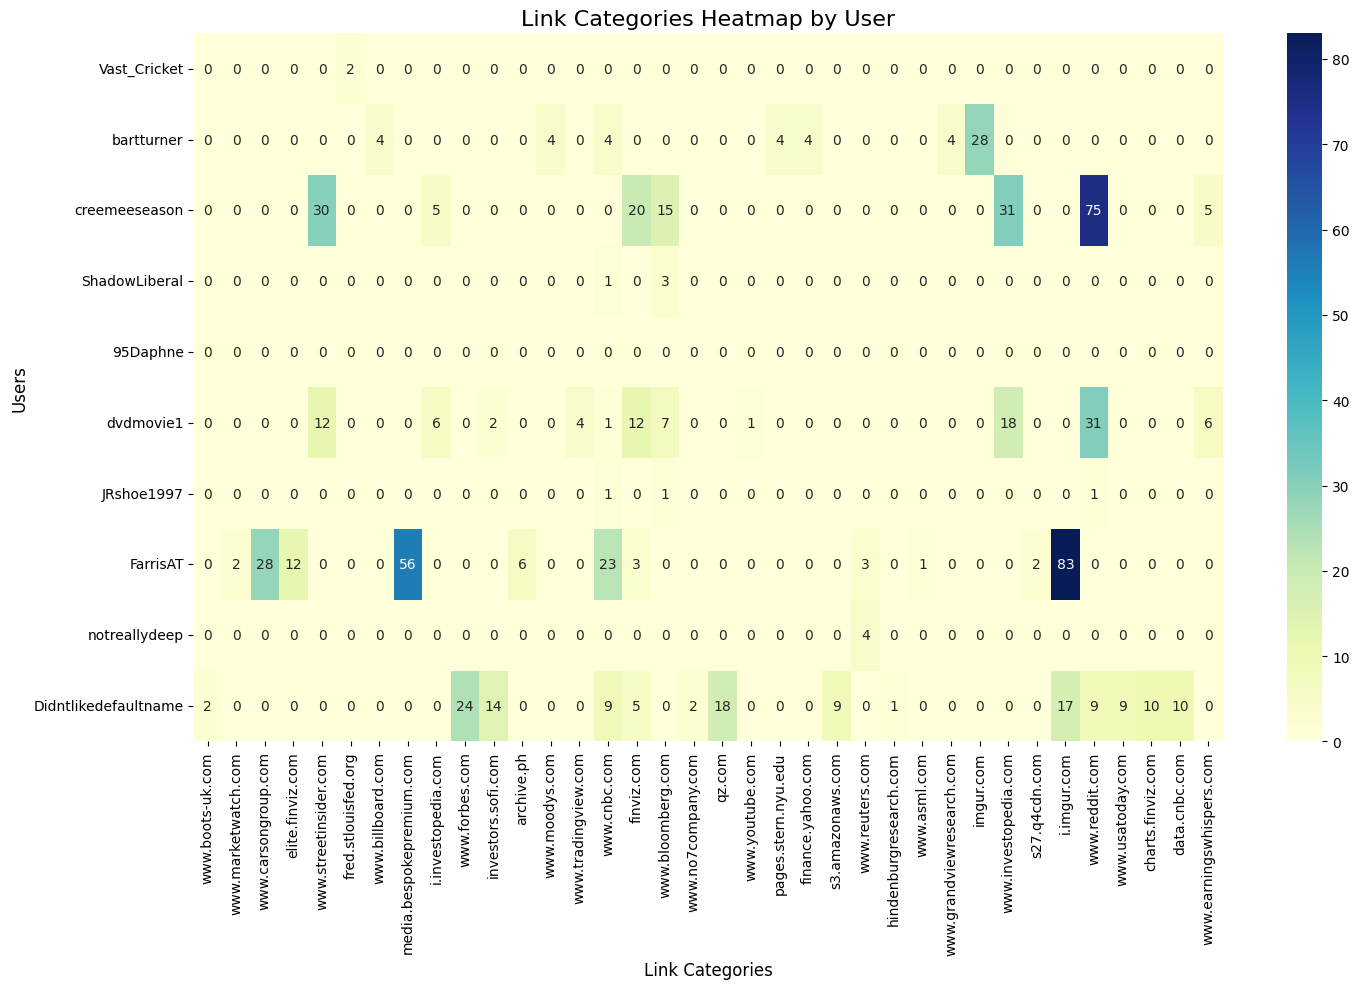

In [179]:

# Identify columns that represent link categories (exclude "User" and other irrelevant columns)
link_columns = [col for col in top_users_df.columns if col not in ["User", "In-Degree", "Out-Degree", "Posts", "Links Shared", "Top Domains"]]

# Create a new DataFrame with only the link category columns
filtered_heatmap_data = top_users_df[link_columns]

# Set 'User' as index to display usernames on the y-axis
filtered_heatmap_data.index = top_users_df["User"]

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Set title and labels
plt.title("Link Categories Heatmap by User", fontsize=16)
plt.xlabel("Link Categories", fontsize=12)
plt.ylabel("Users", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

The heatmap visualizes the distribution of links shared by top users across various domains. Users are represented on the y-axis, while the domains are on the x-axis. Higher values and darker colors indicate greater link activity for specific domains. Notable contributions include FarrisAT’s high activity in “bloomberg.com” and “tradingview.com,” and creemeeseason’s links to “media.bespokepremium.com.” 

!Note.  This visualization did not make it to the report. The reason for making it was to better have an overview over the top users and the links they have linked to. So it was for our self to get a better overview

No ones is earning money in this subreddit

## Top 5 most popular stocks within the network 

In [8]:

from collections import Counter

# Initialize a Counter for stock mentions
stock_counter = Counter()

# Iterate over nodes in the reconstructed graph
for node, attributes in G.nodes(data=True):
    # Add stocks mentioned in the "stocks" attribute
    for stock in attributes.get("stocks", []):
        stock_counter[stock] += 1

    # Add stocks mentioned in "comments_by_stock"
    for stock in attributes.get("comments_by_stock", {}):
        stock_counter[stock] += len(attributes["comments_by_stock"][stock])

# Get the top 5 most popular stocks
top_5_stocks = stock_counter.most_common(5)

# Print the top 5 stocks
print("Top 5 Most Popular Stocks:")
for stock, count in top_5_stocks:
    print(f"{stock}: {count} mentions")

Top 5 Most Popular Stocks:
GOOGL: 11104 mentions
AAPL: 9371 mentions
AMD: 6270 mentions
TSLA: 6151 mentions
NVDA: 6149 mentions


# Communities 

## Louvain Algorithm

Top 5 Communities by Size:
  Community 4: 327 nodes
  Community 3: 310 nodes
  Community 1: 274 nodes
  Community 0: 215 nodes
  Community 2: 172 nodes


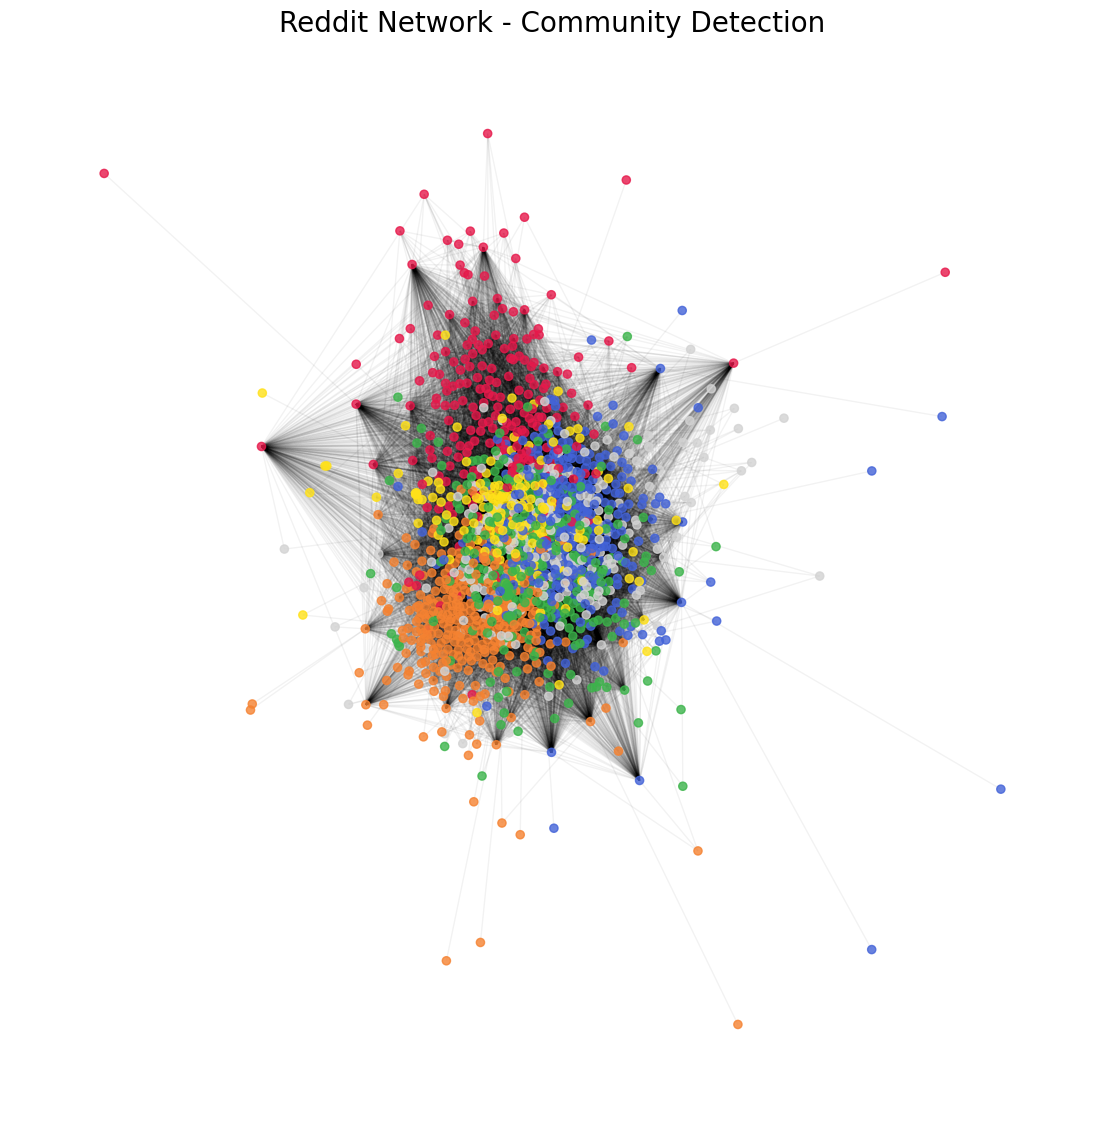

In [17]:


# Set a random seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Define a color palette with enough distinct colors for large communities
color_dict = {
    0: '#e6194B', 1: '#3cb44b', 2: '#ffe119', 3: '#4363d8', 4: '#f58231', 5: '#911eb4', 
    6: '#42d4f4', 7: '#f032e6', 8: '#bfef45', 9: '#fabed4', 10: '#469990', 11: '#dcbeff', 
    12: '#9A6324', 13: '#fffac8', 14: '#800000', 15: '#aaffc3', 16: '#808000', 17: '#ffd8b1', 
    18: '#000075', 19: '#515151'
}
neutral_color = '#d3d3d3'  # Light gray for smaller communities

# Convert your main graph to an undirected version
G_undirected = G.to_undirected()

# Step 1: Filter nodes with sufficient attributes (if required)
nodes_with_content = [node for node, data in G_undirected.nodes(data=True) if data.get('content_length', 0) > 0]
G_filtered = G_undirected.subgraph(nodes_with_content).copy()

# Step 2: Apply the Louvain method for community detection
partition = community_louvain.best_partition(G_filtered, random_state=SEED)

# Group nodes by community
community_nodes = {}
for node, community in partition.items():
    community_nodes.setdefault(community, []).append(node)

# Calculate the size of each community
community_sizes = {community: len(nodes) for community, nodes in community_nodes.items()}

# Get the top 5 communities by size
top_5_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)[:5]

# Filter the top 5 communities and their nodes
top_5_community_nodes = {community: community_nodes[community] for community, _ in top_5_communities}

print("Top 5 Communities by Size:")
for community, size in top_5_communities:
    print(f"  Community {community}: {size} nodes")

# Step 3: Initialize ForceAtlas2 from fa2_modified
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=True,
    edgeWeightInfluence=5.5,
    jitterTolerance=0.2,
    barnesHutOptimize=True,
    barnesHutTheta=0.6,
    scalingRatio=0.1,
    gravity=0.5,
    verbose=False
)

# Step 4: Get the layout positions using ForceAtlas2
positions = forceatlas2.forceatlas2_networkx_layout(G_filtered, pos=None, iterations=1000)

# Step 5: Set node size and color logic
node_size = [70 if community_sizes[partition[node]] <= 2 else 35 for node in G_filtered.nodes]
node_color = [
    color_dict[partition[node] % len(color_dict)] if partition[node] in dict(top_5_communities) else neutral_color
    for node in G_filtered.nodes
]

# Step 6: Plot the network with a white background
plt.figure(figsize=(14, 14), facecolor='white')

# Draw nodes with specified color and size
nx.draw_networkx_nodes(
    G_filtered, pos=positions, node_size=node_size, node_color=node_color, alpha=0.8
)

# Draw edges with light transparency for clarity
nx.draw_networkx_edges(G_filtered, pos=positions, edge_color="k", alpha=0.05)

# Disable axis for a cleaner look
plt.axis('off')

# Display the plot with title
plt.title("Reddit Network - Community Detection", fontsize=20)
plt.show()

# Store top 5 communities in a dictionary
top_5_community_nodes_dict = top_5_community_nodes

Visualizes the Reddit user network with communities detected using the Louvain method. It highlights the top 5 largest communities with distinct colors, while smaller communities are shown in neutral gray.

### Modularity score

In [226]:
import community.community_louvain as community_louvain

# Assuming 'partition' is the community structure found using Louvain method
# and 'G_filtered' is the filtered graph
modularity_score = community_louvain.modularity(partition, G_filtered)

# Print the modularity score
print(f"Modularity Score: {modularity_score:.4f}")

Modularity Score: 0.2388


A score of 0.2388 suggests that the graph has a moderately strong community structure. While not exceptionally high, it implies that nodes are somewhat well-clustered into cohesive groups.

### top 5 users dictionary

In [18]:

# Initialize a dictionary to store the top 5 users by community
top_5_users_community = {}

# Process each community to compute the top 5 users by eigenvector centrality
for community, nodes in top_5_community_nodes.items():
    # Extract users from the community
    users = [node for node in nodes if node in saved_data["nodes"]]

    # Compute eigenvector centrality for the entire graph
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)  # Adjust max_iter if needed

    # Create a dictionary for the centrality values of the users in this community
    user_centrality = {user: eigenvector_centrality[user] for user in users if user in eigenvector_centrality}

    # Get the top 5 users by eigenvector centrality
    top_5_users = sorted(user_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

    # Store the top 5 users for the community along with their stocks
    top_5_users_community[community] = []
    for user, centrality in top_5_users:
        # Get the stocks this user is gravitating towards from the "comments_by_stock"
        user_stocks = saved_data["nodes"].get(user, {}).get("comments_by_stock", {}).keys()
        
        # Store user, centrality, and stocks
        top_5_users_community[community].append({
            "user": user,
            "centrality": centrality,
            "stocks": list(user_stocks)
        })

# Print out the top 5 users by community, including their eigenvector centrality and stocks
print("Top 5 Users by Community (based on Eigenvector Centrality):")
for community, users in top_5_users_community.items():
    print(f"\nCommunity {community}:")
    for user_info in users:
        print(f"  {user_info['user']}; {user_info['centrality']:.4f} eigenvector centrality; Stocks: {', '.join(user_info['stocks'])}")


Top 5 Users by Community (based on Eigenvector Centrality):

Community 4:
  Vast_Cricket; 0.1399 eigenvector centrality; Stocks: NVDA, MU, AMD, SMCI, CELH, IBKR, ASML, INTC, COST, AAPL, MSFT, AMAT, ASTS, TSLA, SOFI, API, PYPL, GOOGL, ANY, RIVN, DKNG, MVST, ALT, GOOG, CTAS, NEXT, ICON, BKNG, PENN, NICE, TTWO, META, ENVX, CROX, ULCC, TMDX, NTLA, MSTR, CRWD, UAL, CAN, ADSK, BKR, ATEC, ADP, SMPL, DOCU, ADBE, CRSP, AMZN, ROIC, PARA, EZPW
  JRshoe1997; 0.0959 eigenvector centrality; Stocks: NVDA, ARM, AMD, SMCI, IBKR, ASML, INTC, AAPL, MSFT, ASTS, RKLB, TSLA, SOFI, META, MBLY, OS, GOOGL, EU, RIVN, LCID, QCOM, ICON, BKNG, PTON, PENN, NICE, TTWO, GOOG, DLTR, CROX, COST, NTLA, CRWD, UAL, CAN, ADSK, ACMR, DOCU, AMZN, ROIC
  stickman07738; 0.0792 eigenvector centrality; Stocks: NVDA, TSLA, AMZN, MSFT, AMD, SMCI, MATH, CELH, ASML, INTC, ASTS, ABCL, LCID, RIVN, SOFI, MBLY, LUNR, GOOGL, RKLB, AMAT, VKTX, ALT, BKNG, NICE, TTWO, GOOG, META, CROX, ULCC, COST, NTLA, CRWD, UAL, CAN, FSLR, ENPH, ARM, ADSK

This output lists the top 5 users in each community based on eigenvector centrality, highlighting their influence within their respective Community. It also includes the stocks these users engage with, providing insights into their interests and contributions to the network’s discussions.

### Top 5 stocks in communties dictionary

In [19]:
# Initialize a dictionary
top_5_stocks_community = {}

# Process each community to compute the top 5 stocks
for community, nodes in top_5_community_nodes.items():
    # Extract users from the community
    users = [node for node in nodes if node in saved_data["nodes"]]

    # Aggregate stocks mentioned by these users
    stocks = []
    for user in users:
        for stock in saved_data["nodes"][user].get("stocks", []):
            stocks.append(stock)

    # Count occurrences of each stock
    stock_counts = Counter(stocks)
    top_5_stocks = stock_counts.most_common(5)

    # Store the top 5 stocks for the community
    top_5_stocks_community[community] = top_5_stocks

print("Top 5 Most Popular Stocks by Community:")
for community, stocks in top_5_stocks_community.items():
    print(f"\nCommunity {community}:")
    for stock, count in stocks:
        print(f"  {stock}; {count} mentions")
        

Top 5 Most Popular Stocks by Community:

Community 4:
  INTC; 190 mentions
  MSFT; 185 mentions
  SOFI; 180 mentions
  GOOG; 169 mentions
  CRWD; 166 mentions

Community 3:
  META; 235 mentions
  NVDA; 234 mentions
  AMD; 232 mentions
  MSFT; 220 mentions
  GOOG; 207 mentions

Community 1:
  MSFT; 204 mentions
  AMD; 198 mentions
  AMZN; 188 mentions
  NVDA; 183 mentions
  TSLA; 173 mentions

Community 0:
  AAPL; 196 mentions
  GOOGL; 192 mentions
  CAN; 138 mentions
  NVDA; 134 mentions
  META; 130 mentions

Community 2:
  MSFT; 134 mentions
  META; 126 mentions
  NVDA; 124 mentions
  AMZN; 120 mentions
  AAPL; 112 mentions


Identifies the top 5 most mentioned stocks within each of the top 5 communities. 

## Sentiment based on community 

This code calculates sentiment metrics for each community, including overall sentiment, top 5 stocks’ sentiment, and sentiment trends over time. It processes user comments, normalizes sentiment scores, and aggregates data at the community, stock, and temporal levels, providing a detailed view of sentiment dynamics within each community.

In [229]:

# Dictionary to store the results
community_sentiment = defaultdict(lambda: {
    "overall_sentiment": 0.0,
    "user_count": 0,
    "top_5_stocks": defaultdict(lambda: {
        "total_sentiment": 0.0,
        "user_sentiments": [],
        "average_sentiment": 0.0,
        "sentiment_over_time": defaultdict(lambda: {"total_sentiment": 0.0, "comments_count": 0, "average_sentiment": 0.0})
    })
})

def normalize_sentiment(value):
    """Normalize sentiment to the range [-1, 1] where 0 is neutral."""
    if value > 1:
        return 1.0
    elif value < -1:
        return -1.0
    return value

# Step 1: Process each community
for community, nodes in top_5_community_nodes.items():
    user_sentiments = []  # Collect user-level sentiment scores for the overall sentiment
    community_user_count = 0

    # Get the top 5 stocks for this community
    top_5_stocks = top_5_stocks_community.get(community, [])

    for node in nodes:
        node_data = saved_data["nodes"].get(node, {})
        comments_by_stock = node_data.get("comments_by_stock", {})
        user_total_sentiment = 0.0
        user_comment_count = 0

        # Calculate the user's sentiment across all comments
        for stock, comments_list in comments_by_stock.items():
            for comment_data in comments_list:
                sentiment_score = comment_data.get("sentiment_score", 0.0)
                user_total_sentiment += sentiment_score
                user_comment_count += 1


        # Skip users with no comments
        if user_comment_count > 0:
            community_user_count += 1
            user_avg_sentiment = user_total_sentiment / user_comment_count
            user_sentiments.append(normalize_sentiment(user_avg_sentiment))

        # Process user sentiment for top 5 stocks
        for stock, comments_list in comments_by_stock.items():
            if stock in [stock_name for stock_name, _ in top_5_stocks]:
                stock_data = community_sentiment[community]["top_5_stocks"][stock]
                for comment_data in comments_list:
                    sentiment_score = normalize_sentiment(comment_data.get("sentiment_score", 0.0))
                    stock_data["total_sentiment"] += sentiment_score
                    stock_data["user_sentiments"].append(sentiment_score)
                    
                    # Process sentiment over time
                    timestamp = comment_data.get("timestamp")
                    if timestamp:
                        try:
                            date = datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%S").date()
                            daily_data = stock_data["sentiment_over_time"][date]
                            daily_data["total_sentiment"] += sentiment_score
                            daily_data["comments_count"] += 1
                        except ValueError:
                            continue  # Skip invalid timestamps

    # Store overall sentiment for the community
    community_sentiment[community]["user_count"] = community_user_count
    community_sentiment[community]["overall_sentiment"] = (
        sum(user_sentiments) / community_user_count if community_user_count > 0 else 0.0
    )

# Step 2: Post-process top 5 stocks data
for community, data in community_sentiment.items():
    for stock, stock_data in data["top_5_stocks"].items():
        # Calculate user-based average sentiment for each stock
        if data["user_count"] > 0:
            stock_data["average_sentiment"] = (
                sum(stock_data["user_sentiments"]) / data["user_count"]
            )

        # Calculate average sentiment over time for each stock
        for date, daily_data in stock_data["sentiment_over_time"].items():
            if daily_data["comments_count"] > 0:
                daily_data["average_sentiment"] = (
                    daily_data["total_sentiment"] / daily_data["comments_count"]
                )

# Final dictionary
community_sentiment_dict = dict(community_sentiment)

## Average sentiment over time for stocks in communities

In [122]:
def print_stock_sentiment_scores(community_sentiment_dict):
    """
    Print sentiment scores for each stock in each community.

    Args:
        community_sentiment_dict (dict): Processed community sentiment data.
    """
    print("Sentiment Scores for Each Stock in Each Community:")
    print("-" * 50)

    for community_id, community_data in community_sentiment_dict.items():
        print(f"Community {community_id}:")
        print(f"  Overall Sentiment: {community_data.get('overall_sentiment', 0.0):.4f}")
        print(f"  User Count: {community_data.get('user_count', 0)}")
        print("  Top 5 Stocks:")
        
        top_5_stocks = community_data.get("top_5_stocks", {})
        for stock, stock_data in top_5_stocks.items():
            total_sentiment = stock_data.get("total_sentiment", 0.0)
            average_sentiment = stock_data.get("average_sentiment", 0.0)
            user_sentiments = stock_data.get("user_sentiments", [])
            print(f"    Stock: {stock}")
            print(f"      Total Sentiment: {total_sentiment:.4f}")
            print(f"      Average Sentiment (User-Based): {average_sentiment:.4f}")
            print(f"      User Sentiments Count: {len(user_sentiments)}")
        
        print("-" * 50)

print_stock_sentiment_scores(community_sentiment_dict)

Sentiment Scores for Each Stock in Each Community:
--------------------------------------------------
Community 4:
  Overall Sentiment: 0.0322
  User Count: 327
  Top 5 Stocks:
    Stock: MSFT
      Total Sentiment: 30.1909
      Average Sentiment (User-Based): 0.0923
      User Sentiments Count: 877
    Stock: SOFI
      Total Sentiment: 66.3895
      Average Sentiment (User-Based): 0.2030
      User Sentiments Count: 978
    Stock: INTC
      Total Sentiment: 28.4661
      Average Sentiment (User-Based): 0.0871
      User Sentiments Count: 1112
    Stock: GOOG
      Total Sentiment: 14.6905
      Average Sentiment (User-Based): 0.0449
      User Sentiments Count: 862
    Stock: CRWD
      Total Sentiment: 66.8170
      Average Sentiment (User-Based): 0.2043
      User Sentiments Count: 962
--------------------------------------------------
Community 3:
  Overall Sentiment: -0.0036
  User Count: 310
  Top 5 Stocks:
    Stock: NVDA
      Total Sentiment: -64.5519
      Average Sentimen

### Heatmap of communities and their sentiment score 

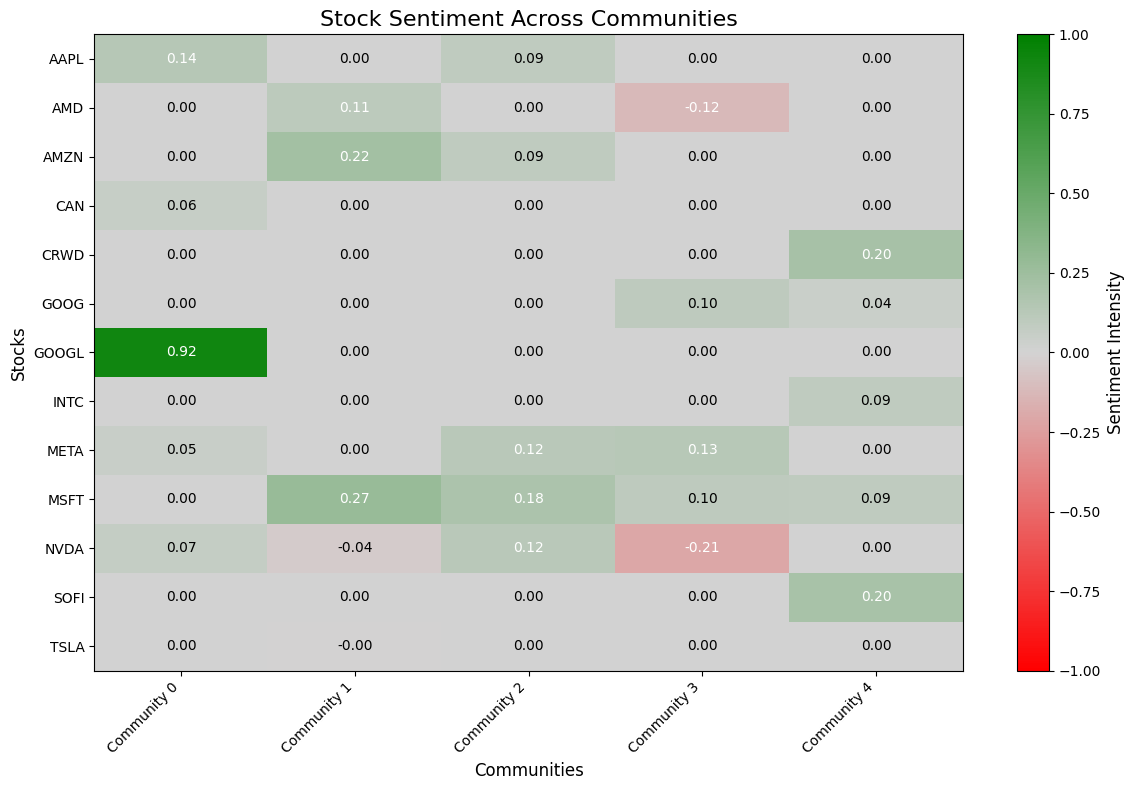

In [232]:

def create_sentiment_heatmap(community_sentiment_dict):
    """
    Create a heatmap for stock sentiment across communities.

    Args:
        community_sentiment_dict (dict): Processed community sentiment data.
    """
    # Extract communities and stocks from the data
    communities = [f"Community {community_id}" for community_id in sorted(community_sentiment_dict.keys())]
    all_stocks = set()
    
    for community_data in community_sentiment_dict.values():
        all_stocks.update(community_data.get("top_5_stocks", {}).keys())
    
    stocks = sorted(all_stocks)  # Sort stocks for consistent ordering

    # Create a sentiment DataFrame
    sentiment_data = {community: [0] * len(stocks) for community in communities}

    for community_id, community_data in community_sentiment_dict.items():
        community_name = f"Community {community_id}"
        top_5_stocks = community_data.get("top_5_stocks", {})
        
        for stock in stocks:
            average_sentiment = top_5_stocks.get(stock, {}).get("average_sentiment", 0.0)
            sentiment_data[community_name][stocks.index(stock)] = average_sentiment

    df = pd.DataFrame(sentiment_data, index=stocks)

    # Normalize the sentiment values for the red-grey-green color scale
    norm = mcolors.Normalize(vmin=-1, vmax=1)  # Fixed range for sentiment normalization

    # Custom red-grey-green colormap
    color_map = mcolors.LinearSegmentedColormap.from_list("sentiment_map", ["red", "lightgrey", "green"])

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    heatmap = plt.imshow(df, cmap=color_map, norm=norm, aspect="auto")

    # Add colorbar
    cbar = plt.colorbar(heatmap)
    cbar.set_label("Sentiment Intensity", fontsize=12)

    # Set axis labels and ticks
    plt.xticks(ticks=np.arange(len(communities)), labels=communities, rotation=45, ha="right")
    plt.yticks(ticks=np.arange(len(stocks)), labels=stocks)
    plt.ylabel("Stocks", fontsize=12)
    plt.xlabel("Communities", fontsize=12)

    # Add the values as text in each cell
    for i in range(len(stocks)):
        for j in range(len(communities)):
            sentiment_value = df.iloc[i, j]
            plt.text(
                j, i, f"{sentiment_value:.2f}", ha="center", va="center", fontsize=10,
                color="black" if abs(sentiment_value) < 0.1 else "white"
            )

    # Title
    plt.title("Stock Sentiment Across Communities", fontsize=16)
    plt.tight_layout()

    # Display the plot
    plt.show()

# Example usage with community_sentiment_dict
create_sentiment_heatmap(community_sentiment_dict)

Heatmap values use the average sentiment (user-based), which is the proportion of sentiment contributed by users divided by the total stock mentions.High sentiment for GOOGL in Community 0 (0.92) indicates significant positive user sentiment, while other stocks show varying intensities, reflecting differing community perspectives. Furthermore, is is interesting to look into NVDA since there is a difference towards the sentiment of the stock

## GOOGL Stock insight analysis

Calculates the sentiment contributions of selected users for the stock "GOOGL" within Community 0.


In [196]:
# Calculate user-level sentiment contributions for GOOGL in Community 0
googl_users = ["95Daphne", "creemeeseason", "Lost-Cabinet4843", "dvdmovie1", "WickedSensitiveCrew"]
googl_sentiments = {}

for user in googl_users:
    user_data = saved_data["nodes"].get(user, {})
    comments = user_data.get("comments_by_stock", {}).get("GOOGL", [])
    total_sentiment = sum(comment.get("sentiment_score", 0) for comment in comments)
    googl_sentiments[user] = total_sentiment

# Display contributions
print("GOOGL Sentiment Contributions by Top Users in Community 0:")
for user, sentiment in googl_sentiments.items():
    print(f"  User: {user}, Total Sentiment: {sentiment:.4f}")

GOOGL Sentiment Contributions by Top Users in Community 0:
  User: 95Daphne, Total Sentiment: 0.1542
  User: creemeeseason, Total Sentiment: 24.5848
  User: Lost-Cabinet4843, Total Sentiment: 4.8121
  User: dvdmovie1, Total Sentiment: 10.9471
  User: WickedSensitiveCrew, Total Sentiment: 11.6883


In [197]:
# Filter comments with significant sentiment contributions
filtered_comments = [
    comment for user in googl_users
    for comment in saved_data["nodes"].get(user, {}).get("comments_by_stock", {}).get("GOOGL", [])
    if abs(comment.get("sentiment_score", 0)) > 0.1  # Set a threshold for significant sentiment
]

# Analyze filtered comments
significant_sentiment = sum(comment["sentiment_score"] for comment in filtered_comments)
print(f"Significant Sentiment for GOOGL in Community 0: {significant_sentiment}")

Significant Sentiment for GOOGL in Community 0: 54.1168143376708


In [20]:
# Step 1: Calculate eigenvector centrality for the entire graph
eigenvector_centrality = nx.eigenvector_centrality(G)

# Step 2: Add eigenvector centrality as a node attribute in the graph
nx.set_node_attributes(G, eigenvector_centrality, "eigenvector_centrality")

# Step 3: Initialize an empty list to store metrics for Community 0
community_0_metrics = []

# Step 4: Iterate over users in Community 0
for user in top_5_community_nodes_dict.get(0, []):  # Fetch users in Community 0
    user_data = G.nodes.get(user, {})  # Retrieve node attributes from the graph
    user_comments = user_data.get("comments_by_stock", {}).get("GOOGL", [])  # Get comments specific to GOOGL
    eigenvector_centrality = user_data.get("eigenvector_centrality", 0)  # Get eigenvector centrality

    # Calculate metrics
    total_comments = sum(len(comments) for comments in user_data.get("comments_by_stock", {}).values())
    googl_comment_count = len(user_comments)
    
    # Sum up sentiment scores for all GOOGL comments
    total_sentiment_googl = sum(comment.get("sentiment_score", 0) for comment in user_comments)
    
    percentage_comments_googl = (googl_comment_count / total_comments * 100) if total_comments > 0 else 0

    # Append metrics to the list
    community_0_metrics.append({
        "Username": user,
        "Comments on GOOGL": googl_comment_count,
        "Total Comments": total_comments,
        "Total Sentiment for GOOGL": total_sentiment_googl,
        "Percentage of Comments on GOOGL": percentage_comments_googl,
        "Eigenvector Centrality": eigenvector_centrality
    })

# Step 5: Convert the list to a DataFrame
df_cluster0 = pd.DataFrame(community_0_metrics)




In [199]:
# Sort the DataFrame by Total Sentiment for GOOGL in descending order
top_users = df_cluster0.sort_values(by="Total Sentiment for GOOGL", ascending=False)

# Optional: Filter out users with very few comments on GOOGL (e.g., < 5)
top_users_filtered = top_users[top_users["Comments on GOOGL"] >= 5]

# Select the top N users (e.g., Top 5)
top_n_users = top_users_filtered.head(5)

# Display the result
top_n_users

Username  Comments on GOOGL  Total Comments  \
97    AluminiumCaffeine                609            1153   
8         creemeeseason                232             888   
78  coveredcallnomad100                466             865   
17  WickedSensitiveCrew                103             400   
79             NotGucci                 76             221   

    Total Sentiment for GOOGL  Percentage of Comments on GOOGL  \
97                  30.594451                        52.818734   
8                   24.584805                        26.126126   
78                  20.732089                        53.872832   
17                  11.688251                        25.750000   
79                  11.173981                        34.389140   

    Eigenvector Centrality  
97                0.069323  
8                 0.122727  
78                0.086477  
17                0.101448  
79                0.055590

### TF-IDF and Word cloud

In [21]:
# Define preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words("english"))
    custom_stopwords = {
        "googl", "google", 'im', 'ive', 'lot'
    }
    stop_words.update(custom_stopwords)
    
    # Remove special characters, numbers, and years, and lowercase text
    text = re.sub(r"\b\d{4}\b", "", text)  # Remove years (e.g., 2022, 2023)
    text = re.sub(r"\b\d+\b", "", text)  # Remove standalone numbers
    text = re.sub(r"[^\w\s]", "", text.lower())  # Remove special characters and lowercase text
    
    # Tokenize and filter out stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    return " ".join(words)

# Step 1: Aggregate all GOOGL-related comments for Community 0
community_0_text = []
for user in top_5_community_nodes_dict.get(0, []):  # Community 0
    user_data = G.nodes[user]
    comments = user_data.get("comments_by_stock", {}).get("GOOGL", [])
    
    # Extract the comment text and append it
    for comment in comments:
        community_0_text.append(comment.get("comment", ""))

# Combine all comments into one string
community_0_text = " ".join(community_0_text)

# Step 2: Preprocess the GOOGL comments for Community 0
processed_text = preprocess_text(community_0_text)

# Step 3: Compute TF-IDF scores
vectorizer = TfidfVectorizer(max_features=100)  # Set the maximum number of features
tfidf_matrix = vectorizer.fit_transform([processed_text])  # Fit and transform
feature_names = vectorizer.get_feature_names_out()  # Extract feature names
tfidf_scores = tfidf_matrix.toarray().flatten()  # Flatten the matrix to an array

# Step 4: Store TF-IDF scores in a DataFrame
tfidf_googl = pd.DataFrame({
    "Word": feature_names,
    "TF-IDF Score": tfidf_scores
}).sort_values(by="TF-IDF Score", ascending=False)



Calculates TF-IDF scores for words in comments about "GOOGL" from Community 0

In [118]:
tfidf_googl.head(20)

Word  TF-IDF Score
47    market      0.301870
38      like      0.289697
78     stock      0.213013
86     think      0.195972
21      dont      0.170106
28      good      0.169497
27     going      0.163107
98      year      0.161281
97     would      0.159151
22  earnings      0.157934
79    stocks      0.149718
77     still      0.147587
88      time      0.142414
17   company      0.139980
58    people      0.138763
11       buy      0.136633
57       one      0.132677
68       see      0.129329
24       get      0.126590
2       also      0.118983

#### Word cloud for community 0 "GOOGL"

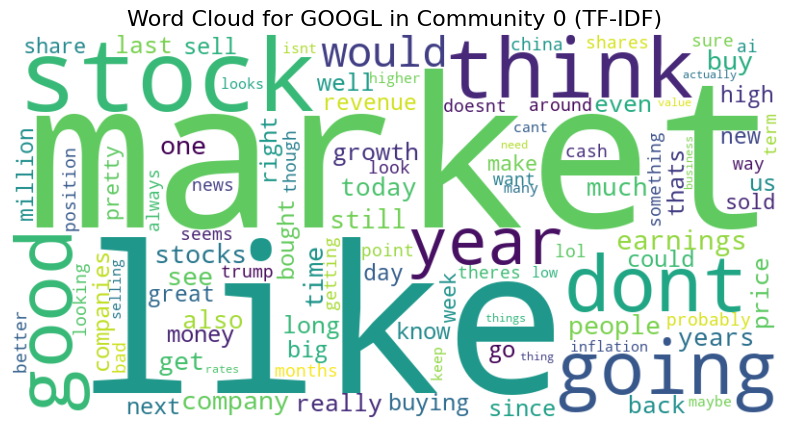

In [194]:
wordcloud = WordCloud(
    width=800, height=400, collocations=False, background_color="white"
).generate_from_frequencies(dict(zip(tfidf_googl["Word"], tfidf_googl["TF-IDF Score"])))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for GOOGL in Community 0 (TF-IDF)", fontsize=16)
plt.show()

## where does users with the most in and out degree belong to and what stocks has they comment the most about

In [74]:
import networkx as nx
import json
from collections import Counter

# Load the saved graph
json_path = "/Users/Thomas/Desktop/Skole/Business Analytics/Social Graphs/Exam/network_with_attributesv6.json"
with open(json_path, "r") as f:
    saved_data = json.load(f)

# Reconstruct the graph
G = nx.DiGraph()
G.add_edges_from(saved_data["edges"])
nx.set_node_attributes(G, saved_data["nodes"])


# Recalculate eigenvector centrality for user assignment
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Update the partition with eigenvector-based assignment
for community, nodes in top_5_community_nodes.items():
    for node in nodes:
        if node in eigenvector_centrality:
            partition[node] = community

# Get top 5 most popular stocks in each community
top_5_stocks_community = {}
for community, nodes in top_5_community_nodes.items():
    stocks = []
    for node in nodes:
        node_data = G.nodes.get(node, {})
        stocks.extend(node_data.get("stocks", []))
    stock_counts = Counter(stocks)
    top_5_stocks = stock_counts.most_common(5)
    top_5_stocks_community[community] = [stock for stock, _ in top_5_stocks]

# Get top in-degree and out-degree nodes
if nx.is_directed(G):
    in_degrees = G.in_degree()
    out_degrees = G.out_degree()

    top_in_degrees = sorted(in_degrees, key=lambda x: x[1], reverse=True)[:5]
    top_out_degrees = sorted(out_degrees, key=lambda x: x[1], reverse=True)[:5]
else:
    print("The graph is not directed. Ensure you use a directed graph.")
    exit()

# Function to get user details
def get_user_details(user, graph, top_5_stocks):
    """Extract total posts and stock mentions limited to top 5 stocks in the community."""
    node_data = graph.nodes.get(user, {})
    post_texts = node_data.get("post_texts", [])
    comments_by_stock = node_data.get("comments_by_stock", {})
    
    total_posts = len(post_texts)
    stock_mentions = {
        stock: len(comments) 
        for stock, comments in comments_by_stock.items() 
        if stock in top_5_stocks
    }
    return total_posts, stock_mentions

# Locate users in communities and print details
def locate_and_print_users(top_users, graph, partition, title, top_5_stocks_community):
    print(f"{title} Users:")
    for user, degree in top_users:
        community = partition.get(user, "Not Found")
        if community == "Not Found":
            print(f"User: {user}")
            print("  Community not found.")
            continue

        top_5_stocks = top_5_stocks_community.get(community, [])
        total_posts, stock_mentions = get_user_details(user, graph, top_5_stocks)
        print(f"User: {user}")
        print(f"  Community: {community}")
        print(f"  Degree: {degree}")
        print(f"  Total Posts: {total_posts}")
        print("  Stock Mentions (Top 5 Stocks):")
        if stock_mentions:
            for stock, count in stock_mentions.items():
                print(f"    Stock: {stock}, Comments: {count}")
        else:
            print("    No mentions of the top 5 stocks.")
        print()

# Print details for top in-degree and out-degree users
locate_and_print_users(top_in_degrees, G, partition, "Top In-Degree", top_5_stocks_community)
locate_and_print_users(top_out_degrees, G, partition, "Top Out-Degree", top_5_stocks_community)

Top In-Degree Users:
User: ShadowLiberal
  Community: 3
  Degree: 129
  Total Posts: 15
  Stock Mentions (Top 5 Stocks):
    Stock: NVDA, Comments: 15
    Stock: MSFT, Comments: 21
    Stock: AMD, Comments: 16
    Stock: GOOG, Comments: 43
    Stock: META, Comments: 43

User: Vast_Cricket
  Community: 4
  Degree: 127
  Total Posts: 6
  Stock Mentions (Top 5 Stocks):
    Stock: INTC, Comments: 24
    Stock: MSFT, Comments: 13
    Stock: SOFI, Comments: 16
    Stock: GOOG, Comments: 17
    Stock: CRWD, Comments: 15

User: 95Daphne
  Community: 0
  Degree: 115
  Total Posts: 0
  Stock Mentions (Top 5 Stocks):
    Stock: NVDA, Comments: 41
    Stock: AAPL, Comments: 202
    Stock: META, Comments: 23
    Stock: GOOGL, Comments: 62
    Stock: CAN, Comments: 30

User: FarrisAT
  Community: 3
  Degree: 97
  Total Posts: 20
  Stock Mentions (Top 5 Stocks):
    Stock: NVDA, Comments: 64
    Stock: AMD, Comments: 47
    Stock: MSFT, Comments: 67
    Stock: GOOG, Comments: 55
    Stock: META, Comm

This output highlights the top users by in-degree and out-degree, categorized by their community, total posts, and mentions of the top 5 stocks within their respective communities. Notably, ShadowLiberal in Community 3 leads in in-degree with 129 connections, frequently mentioning stocks like GOOG and META. Similarly, Didntlikedefaultname in Community 6 dominates out-degree with 401 connections, though they did not contribute to discussions on top stocks. Creemeeseason and dvdmovie1 in Community 0 show significant activity on GOOGL and AAPL

# Communities and their sentiment over time for NVDA + Financial data

Average Earnings Surprise Percentage: 8.43%


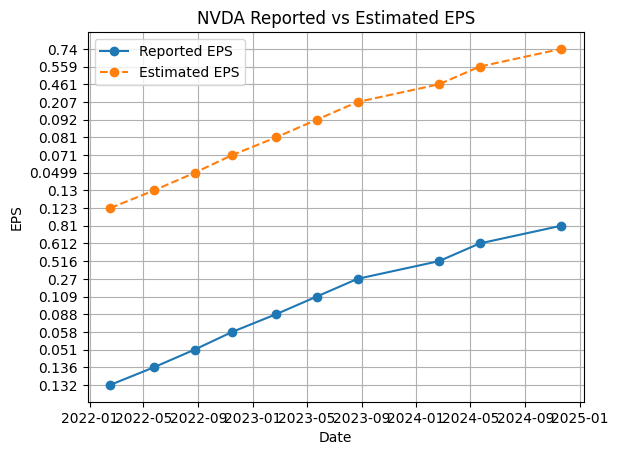

In [233]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch Alpha Vantage Data
def fetch_alpha_vantage_earnings(symbol):
    api_key = "Z9XHSE5C755GBAVT"  # Replace with your API key
    url = f"https://www.alphavantage.co/query?function=EARNINGS&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        quarterly_earnings = data.get("quarterlyEarnings", [])
        return pd.DataFrame(quarterly_earnings)
    else:
        print(f"Error fetching data from Alpha Vantage: {response.status_code}")
        return pd.DataFrame()

# Fetch Alpha Vantage data for NVDA
df_alpha_earnings = fetch_alpha_vantage_earnings("NVDA")
df_alpha_earnings['reportedDate'] = pd.to_datetime(df_alpha_earnings['reportedDate'])

# Step 2: Create Manually Defined DataFrame
data_NVDA = [
    {"Date": "2022-02-16", "Event": "Q4 2021 Earnings Call"},
    {"Date": "2022-05-25", "Event": "Q1 2022 Earnings Call"},
    {"Date": "2022-08-24", "Event": "Q2 2022 Earnings Call"},
    {"Date": "2022-11-16", "Event": "Q3 2022 Earnings Call"},
    {"Date": "2023-02-22", "Event": "Q4 2022 Earnings Call"},
    {"Date": "2023-05-24", "Event": "Q1 2023 Earnings Call"},
    {"Date": "2023-08-23", "Event": "Q2 2023 Earnings Call"},
    {"Date": "2023-11-15", "Event": "Q3 2023 Earnings Call"},
    {"Date": "2024-02-21", "Event": "Q4 2023 Earnings Call"},
    {"Date": "2024-05-22", "Event": "Q1 2024 Earnings Call"},
    {"Date": "2024-08-21", "Event": "Q2 2024 Earnings Call"},
    {"Date": "2024-11-20", "Event": "Q3 2024 Earnings Call"},
]
df_NVDA = pd.DataFrame(data_NVDA)
df_NVDA['Date'] = pd.to_datetime(df_NVDA['Date'])

# Step 3: Merge DataFrames
df_matched = pd.merge(df_NVDA, df_alpha_earnings, left_on="Date", right_on="reportedDate", how="inner")

# Step 4: Store the Final Matched Data in a DataFrame
df_final = df_matched.copy()

# Step 5: Save or Analyze the DataFrame
# Save to a CSV file if needed
#df_final.to_csv("final_nvda_earnings.csv", index=False)

# Optional: Analyze the final DataFrame
average_surprise = df_final['surprisePercentage'].astype(float).mean()
print(f"Average Earnings Surprise Percentage: {average_surprise:.2f}%")

# Step 6: Visualize the Data
plt.plot(df_final['Date'], df_final['reportedEPS'], marker='o', label='Reported EPS')
plt.plot(df_final['Date'], df_final['estimatedEPS'], marker='o', label='Estimated EPS', linestyle='--')
plt.xlabel('Date')
plt.ylabel('EPS')
plt.title('NVDA Reported vs Estimated EPS')
plt.legend()
plt.grid()
plt.show()

Gets NVDA earnings data from Alpha Vantage, merges it with a manually defined earnings schedule, and calculates metrics like the average earnings surprise percentage. Visualizes reported vs estimated EPS over time, highlighting trends and discrepancies in performance.

In [185]:
df_final.head(10)

Date                  Event fiscalDateEnding reportedDate reportedEPS  \
0 2022-02-16  Q4 2021 Earnings Call       2022-01-31   2022-02-16       0.132   
1 2022-05-25  Q1 2022 Earnings Call       2022-04-30   2022-05-25       0.136   
2 2022-08-24  Q2 2022 Earnings Call       2022-07-31   2022-08-24       0.051   
3 2022-11-16  Q3 2022 Earnings Call       2022-10-31   2022-11-16       0.058   
4 2023-02-22  Q4 2022 Earnings Call       2023-01-31   2023-02-22       0.088   
5 2023-05-24  Q1 2023 Earnings Call       2023-04-30   2023-05-24       0.109   
6 2023-08-23  Q2 2023 Earnings Call       2023-07-31   2023-08-23        0.27   
7 2024-02-21  Q4 2023 Earnings Call       2024-01-31   2024-02-21       0.516   
8 2024-05-22  Q1 2024 Earnings Call       2024-04-30   2024-05-22       0.612   
9 2024-11-20  Q3 2024 Earnings Call       2024-10-31   2024-11-20        0.81   

  estimatedEPS surprise surprisePercentage   reportTime  
0        0.123    0.009             7.3171  post-market  
1         0.13    0.006             4.6154  post-market  
2       0.0499   0.0011             2.2044  post-market  
3        0.071   -0.013           -18.3099  post-market  
4        0.081    0.007              8.642  post-market  
5        0.092    0.017            18.4783  post-market  
6        0.207    0.063            30.4348  post-market  
7        0.461    0.055            11.9306  post-market  
8        0.559    0.053             9.4812  post-market  
9         0.74     0.07             9.4595  post-market

In [234]:
# Convert 'surprisePercentage' to numeric
df_final['surprisePercentage'] = pd.to_numeric(df_final['surprisePercentage'], errors='coerce')

Plots average monthly sentiment trends for a stock (e.g., "NVDA") across communities and annotates earnings events with surprise percentage (positive in green, negative in red).

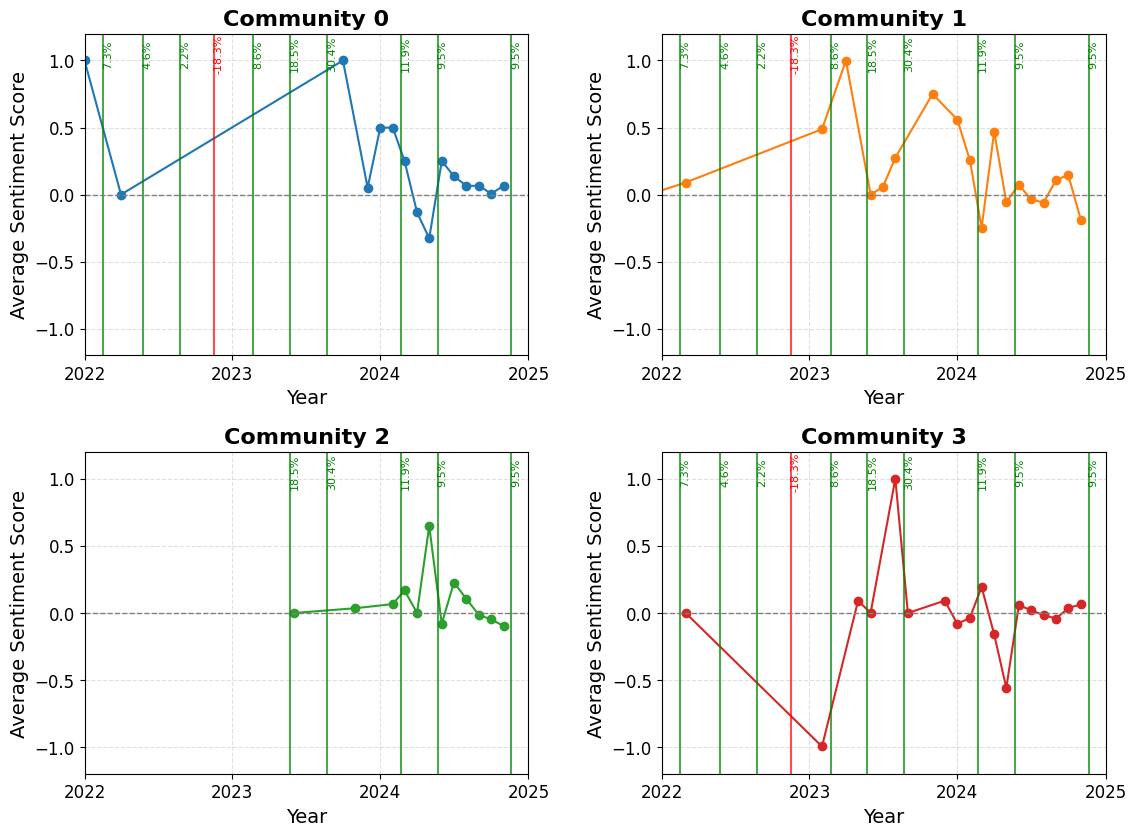

In [266]:
def plot_with_events_from_df(community_sentiment_dict, community_ids, stock_symbol, df_final):
    """
    Plot the sentiment trend for multiple communities and annotate with events from df_final.

    Args:
        community_sentiment_dict (dict): Processed community sentiment data.
        community_ids (list): List of community IDs to analyze.
        stock_symbol (str): The stock symbol to analyze.
        df_final (DataFrame): DataFrame containing event details.
    """
    # Ensure 'surprisePercentage' is numeric
    df_final['surprisePercentage'] = pd.to_numeric(df_final['surprisePercentage'], errors='coerce')

    # Create a subplot grid
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))  # 2 rows x 2 columns
    axs = axs.flatten()  # Flatten the 2D array of axes to a 1D array for easy iteration

    # Define colors for each community
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    for i, community_id in enumerate(community_ids):
        # Retrieve the sentiment data for the specified stock in the community
        stock_data = (
            community_sentiment_dict
            .get(community_id, {})
            .get("top_5_stocks", {})
            .get(stock_symbol, {})
        )

        sentiment_over_time = stock_data.get("sentiment_over_time", {})

        if not sentiment_over_time:
            axs[i].set_title(f'Community {community_id} - No Data', fontsize=16, fontweight='bold')
            axs[i].axis('off')  # Turn off the axis for this subplot
            continue

        # Extract dates and sentiment scores
        sentiments = []
        for date, daily_data in sentiment_over_time.items():
            sentiments.append({
                "date": date,
                "average_sentiment": daily_data.get("total_sentiment", 0.0) / daily_data.get("comments_count", 1)
            })

        # Convert to a DataFrame
        df = pd.DataFrame(sentiments)
        df['date'] = pd.to_datetime(df['date'])
        df['year_month'] = df['date'].dt.to_period('M')  # Group by year-month

        # Group by month and calculate average sentiment
        monthly_sentiment = df.groupby('year_month')['average_sentiment'].mean().reset_index()
        monthly_sentiment['year_month'] = monthly_sentiment['year_month'].dt.to_timestamp()  # Convert back to timestamp for plotting

        # Add a small space before the first point and explicitly set x-axis to end at 2025
        x_min = monthly_sentiment['year_month'].min() - timedelta(days=30)
        x_max = pd.Timestamp('2025-01-01')

        # Plot the sentiment trend
        axs[i].plot(
            monthly_sentiment['year_month'],
            monthly_sentiment['average_sentiment'],
            marker='o',
            linestyle='-',
            color=colors[i],
            label=f'Community {community_id}'
        )

        # Plot events from df_final
        for _, event in df_final.iterrows():
            event_date = pd.to_datetime(event['Date'])
            surprise_percentage = event['surprisePercentage']

            if x_min <= event_date <= x_max:
                # Determine the color of the line (red for negative, green for positive)
                color = 'green' if surprise_percentage > 0 else 'red'
                axs[i].axvline(
                    event_date, color=color, linestyle='-', linewidth=1.5, alpha=0.7, label='Earnings Event'
                )
                # Annotate the surprise percentage
                axs[i].text(
                    event_date, 1.05, f"{surprise_percentage:.1f}%", rotation=90,
                    verticalalignment='center', fontsize=8, color=color
                )

        # Set y-axis limits with additional margin for better visibility
        axs[i].set_ylim(-1.2, 1.2)

        # Format x-axis to start from 2022 and show only years, with unique labels
        axs[i].set_xlim(max(pd.Timestamp('2022-01-01'), x_min), x_max)
        axs[i].xaxis.set_major_formatter(DateFormatter('%Y'))
        axs[i].set_xticks(pd.date_range(start=pd.Timestamp('2022-01-01'), end=x_max, freq='YS'))

        # Customize the subplot
        axs[i].set_title(f'Community {community_id}', fontsize=16, fontweight='bold')
        axs[i].set_xlabel('Year', fontsize=14)
        axs[i].set_ylabel('Average Sentiment Score', fontsize=14)
        axs[i].tick_params(axis='both', labelsize=12)
        axs[i].axhline(0, color='grey', linestyle='--', linewidth=1)
        axs[i].grid(alpha=0.4, linestyle='--')

    # Adjust layout and show the plot
    plt.tight_layout(pad=3.0)
    #plt.suptitle(f'Average {stock_symbol} Sentiment Over Time Across Communities', fontsize=18, fontweight='bold', y=1.02)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()

# community ID
community_ids = [0, 1, 2, 3]
plot_with_events_from_df(community_sentiment_dict, community_ids, stock_symbol="NVDA", df_final=df_final)

            1. open  2. high   3. low  4. close   5. volume
date                                                       
2024-01-24   603.04   628.49   599.38    613.62  55706870.0
2024-01-25   623.50   627.19   608.50    616.17  48277684.0
2024-01-26   609.60   617.83   605.73    610.31  39030859.0
2024-01-29   612.32   624.89   609.07    624.65  34873298.0
2024-01-30   629.00   634.93   622.60    627.74  41073530.0
...             ...      ...      ...       ...         ...
2024-05-22   954.59   960.20   932.49    949.50  54864799.0
2024-05-23  1020.28  1063.20  1015.20   1037.99  83506528.0
2024-05-24  1044.49  1064.75  1030.00   1064.69  42949367.0
2024-05-28  1102.44  1149.39  1098.83   1139.01  65272789.0
2024-05-29  1130.50  1154.92  1109.01   1148.25  55744193.0

[88 rows x 5 columns]


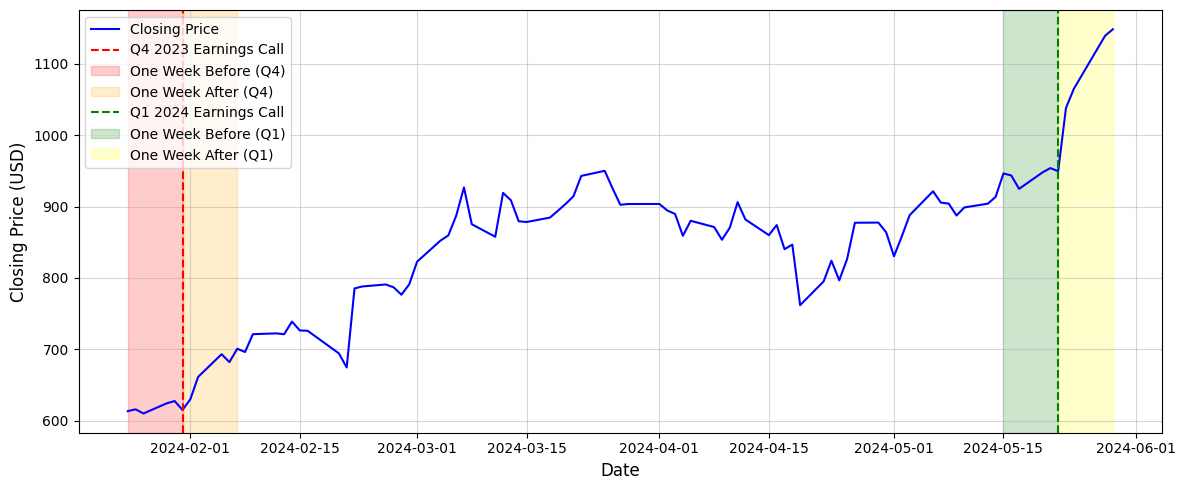

In [258]:
# Your Alpha Vantage API key
API_KEY = "Z9XHSE5C755GBAVT"

# Initialize the TimeSeries object
ts = TimeSeries(key=API_KEY, output_format="pandas")

# Stock symbol (you can replace 'AAPL' with your desired stock)
symbol = "NVDA"

# Fetch daily stock prices
data, meta_data = ts.get_daily(symbol=symbol, outputsize="full")  # Fetch entire history

# Convert the DataFrame index to datetime
data.index = pd.to_datetime(data.index)

# Sort the index to enable slicing
data = data.sort_index()

# Filter for the date range: January 24, 2024, to May 29, 2024
start_date = "2024-01-24"
end_date = "2024-05-29"
filtered_data = data.loc[start_date:end_date]

# Display the filtered stock prices
print(filtered_data)

# Plot the closing prices
plt.figure(figsize=(12, 5))
plt.plot(filtered_data.index, filtered_data["4. close"], label="Closing Price", color="blue")

# Add annotations for Q4 2023 Earnings Call
plt.axvline(pd.to_datetime("2024-01-31"), color="red", linestyle="--", label="Q4 2023 Earnings Call")
plt.axvspan(pd.to_datetime("2024-01-24"), pd.to_datetime("2024-01-31"), color="red", alpha=0.2, label="One Week Before (Q4)")
plt.axvspan(pd.to_datetime("2024-01-31"), pd.to_datetime("2024-02-07"), color="orange", alpha=0.2, label="One Week After (Q4)")

# Add annotations for Q1 2024 Earnings Call
plt.axvline(pd.to_datetime("2024-05-22"), color="green", linestyle="--", label="Q1 2024 Earnings Call")
plt.axvspan(pd.to_datetime("2024-05-15"), pd.to_datetime("2024-05-22"), color="green", alpha=0.2, label="One Week Before (Q1)")
plt.axvspan(pd.to_datetime("2024-05-22"), pd.to_datetime("2024-05-29"), color="yellow", alpha=0.2, label="One Week After (Q1)")

# Add titles, labels, and legend
#plt.title(f"{symbol} Closing Prices with Earnings Call Information", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.legend(loc="upper left")
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

Highlights earnings calls with vertical lines and shaded regions for one week before and after each call, providing context for analyzing stock price movements around these events.

## TF-IDF 

In [22]:
# Step 1: Aggregate NVDA-related comments for each community
nvda_texts = {}

for community_id, user_list in top_5_community_nodes_dict.items():
    community_text = []
    for user in user_list:
        user_data = G.nodes[user]
        comments = user_data.get("comments_by_stock", {}).get("NVDA", [])
        for comment in comments:
            text = comment.get("comment", "")
            # Retain domain-specific numbers (e.g., percentages) and remove others
            text = re.sub(r"\b(?!\d+%)\d+\b", "", text)  # Keeps numbers with % (percentages)
            community_text.append(text)
    nvda_texts[community_id] = " ".join(community_text)

# Step 2: Create a combined stopwords list
custom_stopwords = {'nvda', 'nvidia', 'https', 'stock', 'stocks', 'don', 'll', 've',"www",'com'}
combined_stopwords = list(ENGLISH_STOP_WORDS.union(custom_stopwords))

# Step 3: Compute TF-IDF scores for each community
vectorizer = TfidfVectorizer(max_features=100, stop_words=combined_stopwords)
tfidf_matrix = vectorizer.fit_transform([community_text for community_text in nvda_texts.values()])
feature_names = vectorizer.get_feature_names_out()

# Step 4: Create a dictionary of TF-IDF scores for each community
community_tfidf_scores = {}
for community_id, row in enumerate(tfidf_matrix.toarray()):
    community_tfidf_scores[community_id] = dict(zip(feature_names, row))

# Step 5: Display TF-IDF scores for each community
for community_id, tfidf_dict in community_tfidf_scores.items():
    print(f"\nTF-IDF Scores for Community {community_id}:")
    tfidf_df = pd.DataFrame(list(tfidf_dict.items()), columns=["Word", "TF-IDF Score"])
    tfidf_df = tfidf_df.sort_values(by="TF-IDF Score", ascending=False)
    #print(tfidf_df.head(10))


TF-IDF Scores for Community 0:

TF-IDF Scores for Community 1:

TF-IDF Scores for Community 2:

TF-IDF Scores for Community 3:

TF-IDF Scores for Community 4:


Computes TF-IDF scores for NVDA-related comments across communities, identifying key terms

In [189]:
tfidf_df.head(20)

Word  TF-IDF Score
2          ai      0.342975
89      think      0.284972
44       like      0.252188
30      going      0.249666
42       just      0.234535
51     market      0.181575
11        buy      0.176531
18  companies      0.174010
98       year      0.171488
99      years      0.163922
85       tech      0.158878
28   earnings      0.153835
90       time      0.153835
62     people      0.146269
55      money      0.141225
31       good      0.128616
3         amd      0.121050
50       make      0.118528
9         big      0.110963
17      chips      0.103397

## Word Clouds

Generates word clouds for NVDA-related discussions in selected communities (0, 1, 2, and 3) using TF-IDF scores.

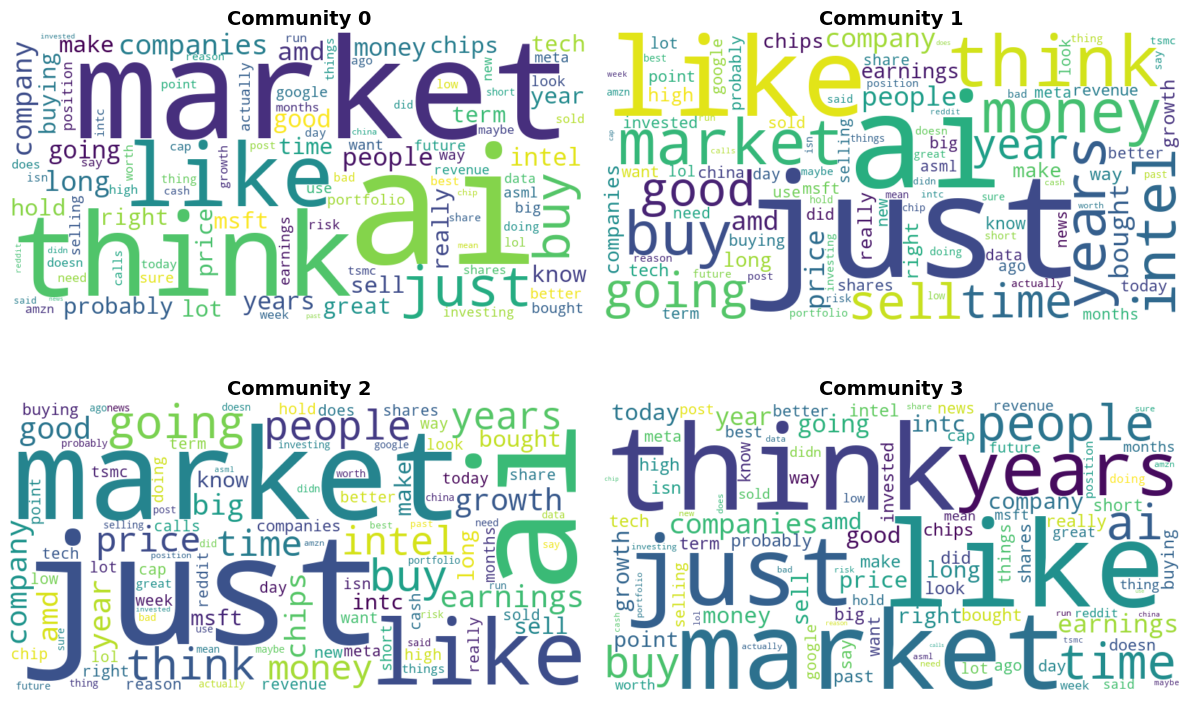

In [23]:
# Filter for communities 0, 1, 2, and 3
selected_communities = [0, 1, 2, 3]
filtered_tfidf_scores = {k: v for k, v in community_tfidf_scores.items() if k in selected_communities}

# Set up the figure
n_communities = len(filtered_tfidf_scores)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid for 4 communities

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate and display word clouds for the selected communities
for ax, (community_id, tfidf_dict) in zip(axes, filtered_tfidf_scores.items()):
    # Generate the word cloud
    wordcloud = WordCloud(
        width=800, height=400,
        collocations=False,
        background_color="white"
    ).generate_from_frequencies(tfidf_dict)
    
    # Plot the word cloud on the corresponding subplot
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Community {community_id}", fontsize=14, fontweight="bold")

# Remove any unused subplot axes
for ax in axes[len(filtered_tfidf_scores):]:
    ax.axis("off")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Top users to drive sentiment

In [ ]:
# Step 1: Calculate eigenvector centrality for the entire graph
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)

# Step 2: Add eigenvector centrality as a node attribute in the graph
nx.set_node_attributes(G, eigenvector_centrality, "eigenvector_centrality")

# Initialize a dictionary to store results for each community
top_users_by_community = {}

# Iterate over the specified communities
for community_id in [0, 1, 2, 3]:
    # Step 1: Initialize an empty list to store metrics for the current community
    community_metrics = []

    # Step 2: Iterate over users in the current community
    for user in top_5_community_nodes_dict.get(community_id, []):  # Fetch users in the community
        user_data = G.nodes.get(user, {})  # Retrieve node attributes from the graph
        user_comments = user_data.get("comments_by_stock", {}).get("NVDA", [])  # Get comments specific to NVDA
        eigenvector_centrality = user_data.get("eigenvector_centrality", 0)  # Get eigenvector centrality

        # Calculate metrics
        total_comments = sum(len(comments) for comments in user_data.get("comments_by_stock", {}).values())
        nvda_comment_count = len(user_comments)

        # Sum up sentiment scores for all NVDA comments
        total_sentiment_nvda = sum(comment.get("sentiment_score", 0) for comment in user_comments)

        percentage_comments_nvda = (nvda_comment_count / total_comments * 100) if total_comments > 0 else 0

        # Append metrics to the list
        community_metrics.append({
            "Community": community_id,
            "Username": user,
            "Comments on NVDA": nvda_comment_count,
            "Total Comments": total_comments,
            "Total Sentiment for NVDA": total_sentiment_nvda,
            "Percentage of Comments on NVDA": percentage_comments_nvda,
            "Eigenvector Centrality": eigenvector_centrality
        })

    # Step 3: Convert the list to a DataFrame
    df_community = pd.DataFrame(community_metrics)

    # Sort the DataFrame by Total Sentiment for NVDA in descending order
    top_users = df_community.sort_values(by="Total Sentiment for NVDA", ascending=False)

    # Optional: Filter out users with very few comments on NVDA (e.g., < 5)
    top_users_filtered = top_users[top_users["Comments on NVDA"] >= 5]

    # Select the top N users (e.g., Top 5)
    top_n_users = top_users_filtered.head(5)

    # Store the result for the current community
    top_users_by_community[community_id] = top_n_users

# Combine results for all communities into a single DataFrame
top_users_nvda_df = pd.concat(
    [df for df in top_users_by_community.values() if not df.empty],
    ignore_index=True
)

# Display the updated DataFrame
print("Updated Top Users by Community for NVDA:")
display(top_users_nvda_df)

# Appendix

Combined plotting for paper

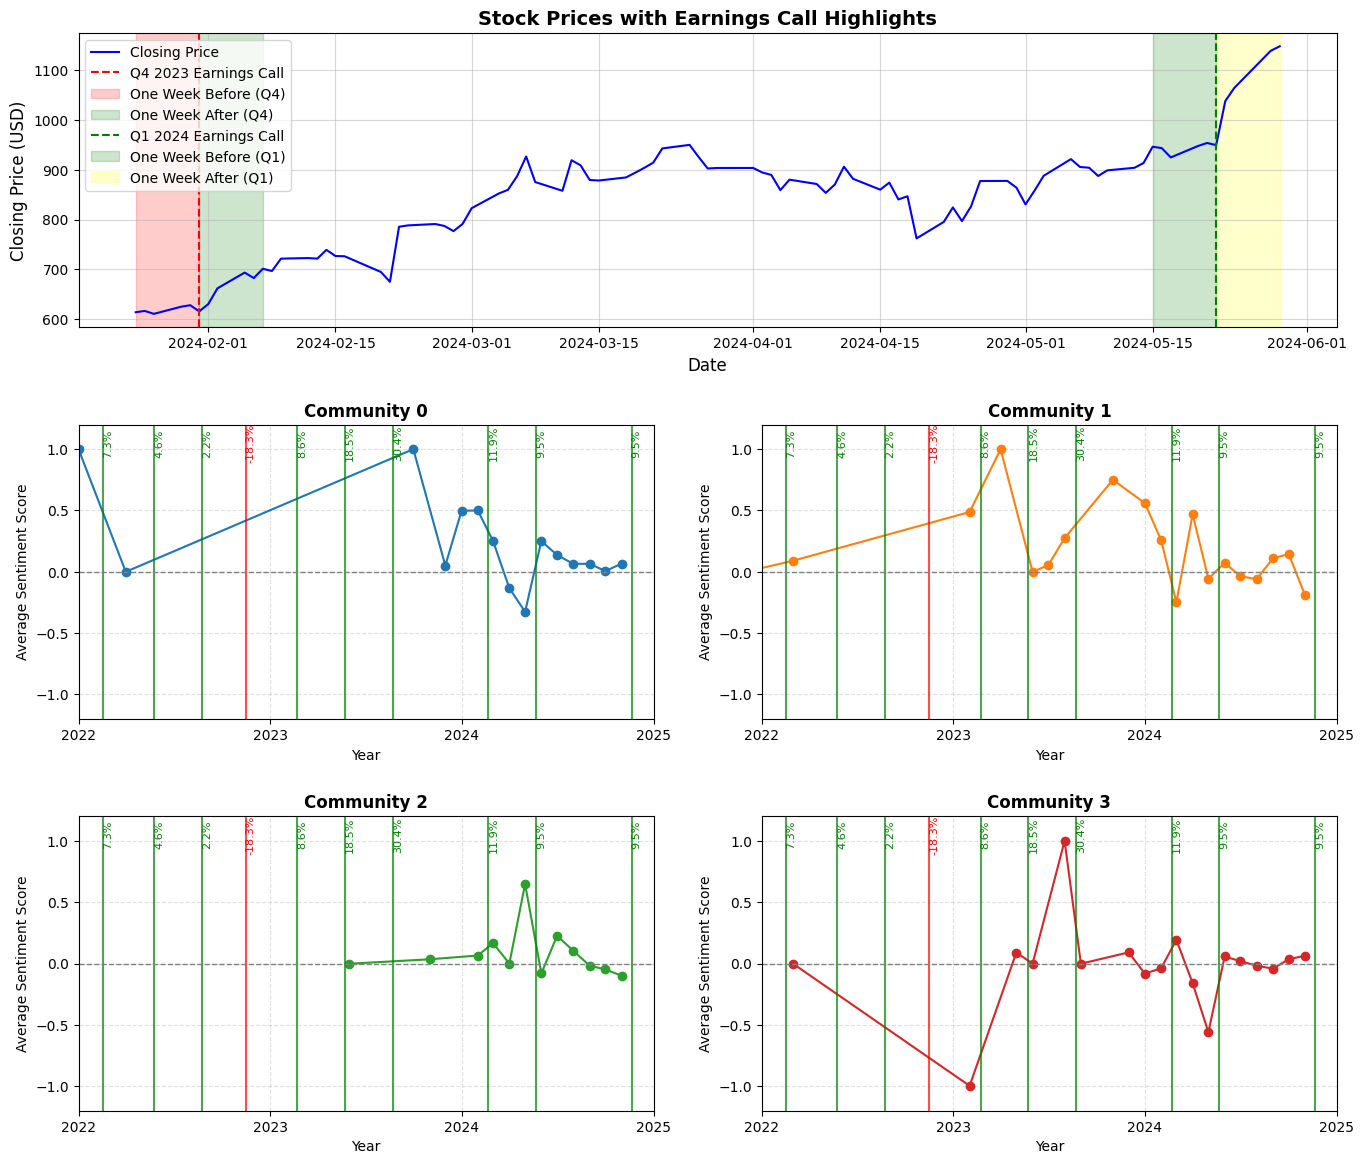

In [275]:
def plot_combined_without_community_legends(community_sentiment_dict, community_ids, stock_symbol, df_final, stock_prices):
    """
    Combine the stock price plot with community sentiment plots in a single figure.

    Args:
        community_sentiment_dict (dict): Processed community sentiment data.
        community_ids (list): List of community IDs to analyze.
        stock_symbol (str): The stock symbol to analyze.
        df_final (DataFrame): DataFrame containing event details.
        stock_prices (DataFrame): DataFrame containing stock price data.
    """
    # Ensure 'surprisePercentage' is numeric
    df_final['surprisePercentage'] = pd.to_numeric(df_final['surprisePercentage'], errors='coerce')

    # Create the combined figure
    fig = plt.figure(figsize=(14, 12))

    # Stock prices subplot (first row, spanning both columns)
    ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
    ax1.plot(stock_prices.index, stock_prices["4. close"], label="Closing Price", color="blue")
    ax1.axvline(pd.to_datetime("2024-01-31"), color="red", linestyle="--", label="Q4 2023 Earnings Call")
    ax1.axvspan(pd.to_datetime("2024-01-24"), pd.to_datetime("2024-01-31"), color="red", alpha=0.2, label="One Week Before (Q4)")
    ax1.axvspan(pd.to_datetime("2024-01-31"), pd.to_datetime("2024-02-07"), color="green", alpha=0.2, label="One Week After (Q4)")
    ax1.axvline(pd.to_datetime("2024-05-22"), color="green", linestyle="--", label="Q1 2024 Earnings Call")
    ax1.axvspan(pd.to_datetime("2024-05-15"), pd.to_datetime("2024-05-22"), color="green", alpha=0.2, label="One Week Before (Q1)")
    ax1.axvspan(pd.to_datetime("2024-05-22"), pd.to_datetime("2024-05-29"), color="yellow", alpha=0.2, label="One Week After (Q1)")
    ax1.set_xlabel("Date", fontsize=12)
    ax1.set_ylabel("Closing Price (USD)", fontsize=12)
    ax1.legend(loc="upper left")
    ax1.grid(alpha=0.5)
    ax1.set_title("Stock Prices with Earnings Call Highlights", fontsize=14, fontweight="bold")

    # Define colors for each community
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Community sentiment subplots (second and third rows)
    for i, community_id in enumerate(community_ids):
        ax = plt.subplot2grid((3, 2), (1 + i // 2, i % 2))
        stock_data = (
            community_sentiment_dict
            .get(community_id, {})
            .get("top_5_stocks", {})
            .get(stock_symbol, {})
        )

        sentiment_over_time = stock_data.get("sentiment_over_time", {})
        if not sentiment_over_time:
            ax.set_title(f"Community {community_id} - No Data", fontsize=12, fontweight="bold")
            ax.axis("off")
            continue

        # Prepare sentiment data
        sentiments = []
        for date, daily_data in sentiment_over_time.items():
            sentiments.append({
                "date": date,
                "average_sentiment": daily_data.get("total_sentiment", 0.0) / daily_data.get("comments_count", 1)
            })

        df = pd.DataFrame(sentiments)
        df['date'] = pd.to_datetime(df['date'])
        df['year_month'] = df['date'].dt.to_period('M')
        monthly_sentiment = df.groupby('year_month')['average_sentiment'].mean().reset_index()
        monthly_sentiment['year_month'] = monthly_sentiment['year_month'].dt.to_timestamp()

        ax.plot(
            monthly_sentiment['year_month'],
            monthly_sentiment['average_sentiment'],
            marker='o',
            linestyle='-',
            color=colors[i]
        )

        # Add event annotations
        for _, event in df_final.iterrows():
            event_date = pd.to_datetime(event['Date'])
            surprise_percentage = event['surprisePercentage']
            color = 'green' if surprise_percentage > 0 else 'red'
            ax.axvline(event_date, color=color, linestyle='-', linewidth=1.5, alpha=0.7)
            ax.text(event_date, 1.05, f"{surprise_percentage:.1f}%", rotation=90, verticalalignment="center", fontsize=8, color=color)

        ax.set_xlim([pd.Timestamp("2022-01-01"), pd.Timestamp("2025-01-01")])
        ax.set_ylim([-1.2, 1.2])
        ax.axhline(0, color="grey", linestyle="--", linewidth=1)
        ax.grid(alpha=0.4, linestyle="--")
        ax.set_title(f"Community {community_id}", fontsize=12, fontweight="bold")
        ax.set_xlabel("Year", fontsize=10)
        ax.set_ylabel("Average Sentiment Score", fontsize=10)

        # Format x-axis to display unique years
        years = pd.date_range(start="2022-01-01", end="2025-01-01", freq="YS")
        ax.set_xticks(years)
        ax.xaxis.set_major_formatter(DateFormatter('%Y'))

    plt.tight_layout(pad=2.0)
    plt.show()

# Example usage
community_ids = [0, 1, 2, 3]
plot_combined_without_community_legends(
    community_sentiment_dict,
    community_ids,
    stock_symbol="NVDA",
    df_final=df_final,
    stock_prices=filtered_data
)